# **ZONAL ACCIDENT RISK ANALYSIS**

## **Team Members: Tejaswini Parlapalli & Arunodhaya Reddy Chityala**

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.2.0-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd

Reading data into dataframes

In [8]:
df1 = spark.read.option("header",True).csv("/content/drive/MyDrive/Colab Notebooks/Project/train.csv", header=True, sep=",")
df1.head()

Row(Accident_ID='1', Police_Force='34', Number_of_Vehicles='2', Number_of_Casualties='1', Date='19/12/12', Day_of_Week='7', Time='13:20', Local_Authority_(District)='344', Local_Authority_(Highway)='E10000032', 1st_Road_Class='4', 1st_Road_Number='395', Road_Type='Single carriageway', Speed_limit='30', 2nd_Road_Class='-1', 2nd_Road_Number='0', Pedestrian_Crossing-Human_Control='None within 50 metres', Pedestrian_Crossing-Physical_Facilities='No physical crossing within 50 meters', Light_Conditions='Daylight: Street light present', Weather_Conditions='Fine without high winds', Road_Surface_Conditions='Dry', Special_Conditions_at_Site='Ol or diesel', Carriageway_Hazards='None', Urban_or_Rural_Area='1', Did_Police_Officer_Attend_Scene_of_Accident='Yes', state='England', postcode='OX3 9UP', country='United Kingdom')

In [9]:
df2 = spark.read.option("header",True).csv("/content/drive/MyDrive/Colab Notebooks/Project/test.csv", header=True, sep=",")
df2.head()

Row(Accident_ID='14', Police_Force='13', Number_of_Vehicles='2', Number_of_Casualties='0', Date='06/10/13', Day_of_Week='6', Time='13:28', Local_Authority_(District)='218', Local_Authority_(Highway)='E10000032', 1st_Road_Class='4', 1st_Road_Number='6358', Road_Type='Single carriageway', Speed_limit='60', 2nd_Road_Class='6', 2nd_Road_Number='0', Pedestrian_Crossing-Human_Control='None within 50 metres', Pedestrian_Crossing-Physical_Facilities='No physical crossing within 50 meters', Light_Conditions='Daylight: Street light present', Weather_Conditions='Snowing without high winds', Road_Surface_Conditions='Dry', Special_Conditions_at_Site='None', Carriageway_Hazards='None', Urban_or_Rural_Area='2', Did_Police_Officer_Attend_Scene_of_Accident='Yes', state='England', postcode='HX2 8WH', country='United Kingdom')

Combining two dataframes into new dataframe and sava as new csv file

In [10]:
newdf = df1.union(df2)
newdf.write.format("csv").mode("overwrite").options(header="true",sep=",").save(path="/content/drive/MyDrive/Colab Notebooks/Project/data")
newdf.printSchema

<bound method DataFrame.printSchema of DataFrame[Accident_ID: string, Police_Force: string, Number_of_Vehicles: string, Number_of_Casualties: string, Date: string, Day_of_Week: string, Time: string, Local_Authority_(District): string, Local_Authority_(Highway): string, 1st_Road_Class: string, 1st_Road_Number: string, Road_Type: string, Speed_limit: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Light_Conditions: string, Weather_Conditions: string, Road_Surface_Conditions: string, Special_Conditions_at_Site: string, Carriageway_Hazards: string, Urban_or_Rural_Area: string, Did_Police_Officer_Attend_Scene_of_Accident: string, state: string, postcode: string, country: string]>

Reading the new saved csv file into dataframe

In [11]:
df = spark.read.option("header",True).csv("/content/drive/MyDrive/Colab Notebooks/Project/data")
df.sort("Accident_ID").collect()
print((df.count(), len(df.columns)))
df.show(20)

(600000, 27)
+-----------+------------+------------------+--------------------+--------+-----------+-----+--------------------------+-------------------------+--------------+---------------+------------------+-----------+--------------+---------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+--------------------+-------------------+-------------------------------------------+---------------+--------+--------------+
|Accident_ID|Police_Force|Number_of_Vehicles|Number_of_Casualties|    Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestrian_Crossing-Physical_Facilities|    Light_Conditions|  Weather_Conditions|Road_Surface_Conditions|Special_Conditions_at_Site| Carriageway_Hazards|Urban_or_Rural_Area|Did_Poli

## **DATA CLEANING**

Dropping unwanted columns

In [12]:
dropcols = ("Local_Authority_(District)","Local_Authority_(Highway)","Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities","Did_Police_Officer_Attend_Scene_of_Accident","country")
df = df.drop(*dropcols)
df.orderBy("Accident_ID").show(20)
df.dtypes

+-----------+------------+------------------+--------------------+--------+-----------+-----+--------------+---------------+------------------+-----------+--------------+---------------+--------------------+--------------------+-----------------------+--------------------------+--------------------+-------------------+-------+--------+
|Accident_ID|Police_Force|Number_of_Vehicles|Number_of_Casualties|    Date|Day_of_Week| Time|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|    Light_Conditions|  Weather_Conditions|Road_Surface_Conditions|Special_Conditions_at_Site| Carriageway_Hazards|Urban_or_Rural_Area|  state|postcode|
+-----------+------------+------------------+--------------------+--------+-----------+-----+--------------+---------------+------------------+-----------+--------------+---------------+--------------------+--------------------+-----------------------+--------------------------+--------------------+-------------------+----

[('Accident_ID', 'string'),
 ('Police_Force', 'string'),
 ('Number_of_Vehicles', 'string'),
 ('Number_of_Casualties', 'string'),
 ('Date', 'string'),
 ('Day_of_Week', 'string'),
 ('Time', 'string'),
 ('1st_Road_Class', 'string'),
 ('1st_Road_Number', 'string'),
 ('Road_Type', 'string'),
 ('Speed_limit', 'string'),
 ('2nd_Road_Class', 'string'),
 ('2nd_Road_Number', 'string'),
 ('Light_Conditions', 'string'),
 ('Weather_Conditions', 'string'),
 ('Road_Surface_Conditions', 'string'),
 ('Special_Conditions_at_Site', 'string'),
 ('Carriageway_Hazards', 'string'),
 ('Urban_or_Rural_Area', 'string'),
 ('state', 'string'),
 ('postcode', 'string')]

Converting datatypes of columns

In [13]:
df = df.withColumn("Accident_ID", df["Accident_ID"].cast(IntegerType()))
df = df.withColumn("Police_Force", df["Police_Force"].cast(IntegerType()))
df = df.withColumn("Number_of_Vehicles", df["Number_of_Vehicles"].cast(IntegerType()))
df = df.withColumn("Number_of_Casualties", df["Number_of_Casualties"].cast(IntegerType()))
df = df.withColumn("Day_of_Week", df["Day_of_Week"].cast(IntegerType()))
df = df.withColumn("1st_Road_Number", df["1st_Road_Number"].cast(IntegerType()))
df = df.withColumn("Speed_limit", df["Speed_limit"].cast(IntegerType()))
df = df.withColumn("Urban_or_Rural_Area", df["Urban_or_Rural_Area"].cast(IntegerType()))

df.show(10)
df.dtypes

+-----------+------------+------------------+--------------------+--------+-----------+-----+--------------+---------------+------------------+-----------+--------------+---------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------+--------+
|Accident_ID|Police_Force|Number_of_Vehicles|Number_of_Casualties|    Date|Day_of_Week| Time|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|    Light_Conditions|  Weather_Conditions|Road_Surface_Conditions|Special_Conditions_at_Site|Carriageway_Hazards|Urban_or_Rural_Area|  state|postcode|
+-----------+------------+------------------+--------------------+--------+-----------+-----+--------------+---------------+------------------+-----------+--------------+---------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------

[('Accident_ID', 'int'),
 ('Police_Force', 'int'),
 ('Number_of_Vehicles', 'int'),
 ('Number_of_Casualties', 'int'),
 ('Date', 'string'),
 ('Day_of_Week', 'int'),
 ('Time', 'string'),
 ('1st_Road_Class', 'string'),
 ('1st_Road_Number', 'int'),
 ('Road_Type', 'string'),
 ('Speed_limit', 'int'),
 ('2nd_Road_Class', 'string'),
 ('2nd_Road_Number', 'string'),
 ('Light_Conditions', 'string'),
 ('Weather_Conditions', 'string'),
 ('Road_Surface_Conditions', 'string'),
 ('Special_Conditions_at_Site', 'string'),
 ('Carriageway_Hazards', 'string'),
 ('Urban_or_Rural_Area', 'int'),
 ('state', 'string'),
 ('postcode', 'string')]

In [14]:
df.agg({'Accident_ID': 'min'}).show()
df.agg({'Accident_ID': 'max'}).show()

+----------------+
|min(Accident_ID)|
+----------------+
|               1|
+----------------+

+----------------+
|max(Accident_ID)|
+----------------+
|          600000|
+----------------+



Removing rows with null values

In [15]:
df_dropped = df.na.drop()
print((df_dropped.count(), len(df_dropped.columns)))

(599421, 21)


In [16]:
from pyspark.sql import functions as f

Calculate bounds to observe outliers

In [17]:
def calculate_bounds(df):
  bounds = {
        c: dict(zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0)))
        for c,d in zip(df.columns, df.dtypes) if d[1] == "int"
    }

  for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['min'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['max'] = bounds[c]['q3'] + (iqr * 1.5)

  return bounds

In [18]:
calculate_bounds(df_dropped)

{'1st_Road_Number': {'max': 1447.5, 'min': -852.5, 'q1': 10.0, 'q3': 585.0},
 'Accident_ID': {'max': 900023.5,
  'min': -300036.5,
  'q1': 149986.0,
  'q3': 450001.0},
 'Day_of_Week': {'max': 10.5, 'min': -1.5, 'q1': 3.0, 'q3': 6.0},
 'Number_of_Casualties': {'max': 1.0, 'min': 1.0, 'q1': 1.0, 'q3': 1.0},
 'Number_of_Vehicles': {'max': 3.5, 'min': -0.5, 'q1': 1.0, 'q3': 2.0},
 'Police_Force': {'max': 98.5, 'min': -49.5, 'q1': 6.0, 'q3': 43.0},
 'Speed_limit': {'max': 55.0, 'min': 15.0, 'q1': 30.0, 'q3': 40.0},
 'Urban_or_Rural_Area': {'max': 3.5, 'min': -0.5, 'q1': 1.0, 'q3': 2.0}}

In [19]:
final_df = df_dropped

Research Q1 Finding which postal code is experiencing the most accidents?





In [20]:
final_df.registerTempTable("count")

spark-3.2.0-bin-hadoop3.2/python/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [21]:
sql1 = spark.sql("select postcode, count(postcode) as accident_count, sum(Number_of_casualties) as casualty_count from count group by postcode order by accident_count desc")
sql1.show()

+--------+--------------+--------------+
|postcode|accident_count|casualty_count|
+--------+--------------+--------------+
| B32 1AG|            30|            41|
| BB2 7NP|            30|            31|
|MK10 9AP|            29|            46|
| SM7 3AS|            29|            32|
|OX20 1TE|            29|            40|
| LE6 0GF|            28|            48|
|WA16 0SR|            28|            37|
|LE67 1DD|            28|            15|
|CT11 9JP|            28|            38|
|TQ10 9ER|            28|            37|
| EH2 2PB|            27|            43|
|CM22 7UA|            27|            32|
| HX4 8LZ|            27|            34|
| DD3 0AJ|            27|            35|
| WR5 3TL|            27|            33|
|AB11 6JS|            27|            43|
| RH5 4QQ|            26|            37|
|ST11 9FF|            26|            33|
| S70 5TZ|            26|            16|
|BA11 2QL|            26|            14|
+--------+--------------+--------------+
only showing top

In [22]:
sql2 = spark.sql("select postcode, Road_Type, Speed_Limit from count where postcode = 'B32 1AG'")
sql2.show(30)

+--------+------------------+-----------+
|postcode|         Road_Type|Speed_Limit|
+--------+------------------+-----------+
| B32 1AG|    One way street|         70|
| B32 1AG|Single carriageway|         30|
| B32 1AG|Single carriageway|         30|
| B32 1AG|Single carriageway|         30|
| B32 1AG|Single carriageway|         40|
| B32 1AG|Single carriageway|         30|
| B32 1AG|    One way street|         30|
| B32 1AG|Single carriageway|         30|
| B32 1AG|  Dual carriageway|         70|
| B32 1AG|Single carriageway|         30|
| B32 1AG|Single carriageway|         60|
| B32 1AG|  Dual carriageway|         60|
| B32 1AG|Single carriageway|         30|
| B32 1AG|Single carriageway|         30|
| B32 1AG|    One way street|         30|
| B32 1AG|        Roundabout|         40|
| B32 1AG|Single carriageway|         30|
| B32 1AG|    One way street|         30|
| B32 1AG|Single carriageway|         70|
| B32 1AG|Single carriageway|         30|
| B32 1AG|Single carriageway|     

Research Q2 Finding which days are experiencing the most accidents?

In [23]:
sql3 = spark.sql("select Day_of_Week, count(Day_of_Week) as accident_count_on_days, sum(Number_of_casualties) as Casualty_count_on_days from count group by Day_of_Week order by Day_of_Week")
sql3.show(10)

+-----------+----------------------+----------------------+
|Day_of_Week|accident_count_on_days|Casualty_count_on_days|
+-----------+----------------------+----------------------+
|          1|                 48249|                 48210|
|          2|                 72816|                 85064|
|          3|                117500|                141200|
|          4|                 56271|                 67681|
|          5|                 87411|                107019|
|          6|                121503|                147199|
|          7|                 95671|                103522|
+-----------+----------------------+----------------------+



In [24]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'spark-3.2.0-bin-hadoop3.2'

In [25]:
from pyspark import SparkContext , SparkConf
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
conf= pyspark.SparkConf().setAppName('SparkApp').setMaster('local')

Setting random seed

In [26]:
import random
import numpy as np 
import pandas as spark 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import tensorflow as tf 
import os 


SEED = 22022022

def random_seed(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    tf.random.set_seed(SEED)

random_seed(SEED)

Reading all csv files

In [27]:
Train = spark.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/train.csv")
Population = spark.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/population.csv")
Road_Network = spark.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/roads_network.csv")
Test = spark.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/test.csv")
SampleSubmission = spark.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/sample_submission.csv")

Understanding the train data set

In [28]:
Train.info()
print(Train.columns[Train.isnull().any()])
print(Test.columns[Test.isnull().any()])
print(Train.isnull().sum())
print(Test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478741 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  478741 non-null  int64 
 1   Police_Force                                 478741 non-null  int64 
 2   Number_of_Vehicles                           478741 non-null  int64 
 3   Number_of_Casualties                         478741 non-null  int64 
 4   Date                                         478741 non-null  object
 5   Day_of_Week                                  478741 non-null  int64 
 6   Time                                         478727 non-null  object
 7   Local_Authority_(District)                   478741 non-null  int64 
 8   Local_Authority_(Highway)                    478741 non-null  object
 9   1st_Road_Class                               478741 non-null  int64 
 

In [29]:
from sklearn.utils import shuffle
Train = shuffle(Train,random_state=SEED)
Train.reset_index(drop=True,inplace=True)

In [30]:
Train.head(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,411055,6,2,3,17/01/12,6,10:30,76,W06000011,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BN12 6HU,United Kingdom
1,508680,43,2,1,09/09/12,1,11:20,6,E08000032,5,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,CO2 0HR,United Kingdom


Vectorizing the features

In [31]:
from pyspark.ml.feature import VectorAssembler,StandardScaler

vec_final = VectorAssembler()\
          .setInputCols (["Police_Force", "Number_of_Vehicles", "Day_of_Week", "Number_of_Casualties", "Urban_or_Rural_Area"])\
          .setOutputCol ("features")

vec_final_df = vec_final.transform(final_df)
vec_final_df = vec_final_df.select(["features", "Speed_limit"])
vec_final_df.show(3)

+--------------------+-----------+
|            features|Speed_limit|
+--------------------+-----------+
|[34.0,2.0,7.0,1.0...|         30|
|[5.0,2.0,4.0,1.0,...|         30|
|[1.0,2.0,4.0,1.0,...|         40|
+--------------------+-----------+
only showing top 3 rows



Dividing Test and Train dataset

In [32]:
splits = vec_final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

Linear regression model

In [33]:
from pandas.core.dtypes.cast import maybe_unbox_datetimelike_tz_deprecation
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = "features", labelCol = "Speed_limit", maxIter=10)
lr_Model = lr.fit(train_df)
print("Coefficients: " + str(lr_Model.coefficients))
print("Intercept: " + str(lr_Model.intercept))

Coefficients: [-0.013103764560488552,-0.509425290491073,0.09317074386203869,0.6279061960501763,13.194571269258459]
Intercept: 18.352316477510875


In [34]:
trainingSummary = lr_Model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 10.485732
r2: 0.275869


In [35]:
lr_predictions = lr_Model.transform(test_df)
lr_predictions.select("prediction","Speed_limit","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Speed_limit",metricName="r2")

print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+-----------+--------------------+
|        prediction|Speed_limit|            features|
+------------------+-----------+--------------------+
|31.745435631629988|         20|[1.0,1.0,1.0,1.0,...|
|31.745435631629988|         20|[1.0,1.0,1.0,1.0,...|
|31.745435631629988|         20|[1.0,1.0,1.0,1.0,...|
|31.745435631629988|         30|[1.0,1.0,1.0,1.0,...|
|31.745435631629988|         30|[1.0,1.0,1.0,1.0,...|
+------------------+-----------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.275345


Random Forest Classification

In [36]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = "features", labelCol = "Speed_limit")
rfModel = rf.fit(train_df)
predictions = rfModel.transform(test_df)
predictions.select("features", "rawPrediction", "Speed_limit", "prediction", "probability").show(10)

+--------------------+--------------------+-----------+----------+--------------------+
|            features|       rawPrediction|Speed_limit|prediction|         probability|
+--------------------+--------------------+-----------+----------+--------------------+
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         20|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         20|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         20|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         30|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         30|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         30|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         30|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0.0,0.0,...|         30|      30.0|[0.0,0.0,0.0,0.0,...|
|[1.0,1.0,1.0,1.0,...|[0.0,0.0,0

In [37]:
trainingSummary2 = rfModel.summary

In [38]:
accuracy = trainingSummary2.accuracy
falsePositiveRate = trainingSummary2.weightedFalsePositiveRate
truePositiveRate = trainingSummary2.weightedTruePositiveRate
fMeasure = trainingSummary2.weightedFMeasure
precision = trainingSummary2.weightedPrecision
recall = trainingSummary2.weightedRecall
print("accuracy: " +str (accuracy))
print("false positive rate: " +str (falsePositiveRate))
print("true positive rate: " +str (truePositiveRate))
print("fMeasure: " +str (fMeasure))
print("precision: " +str (precision))
print("recall: " +str (recall))

accuracy: 0.7402429161388215
false positive rate: 0.42113533120619845
true positive rate: 0.7402429161388215
fMeasure: <bound method _ClassificationSummary.weightedFMeasure of <pyspark.ml.classification.RandomForestClassificationTrainingSummary object at 0x7f60ed6671d0>>
precision: 0.6347992355497523
recall: 0.7402429161388215


Filling null values in test and train data set

In [39]:
Train['Road_Surface_Conditions'].fillna('Missing',inplace=True)
Train['Special_Conditions_at_Site'].fillna('Missing',inplace=True)

Test['Road_Surface_Conditions'].fillna('Missing',inplace=True)
Test['Special_Conditions_at_Site'].fillna('Missing',inplace=True)

print(Train.columns[Train.isnull().any()])
print(Test.columns[Test.isnull().any()])

Index(['Time'], dtype='object')
Index(['Time'], dtype='object')


plotting number of casualties

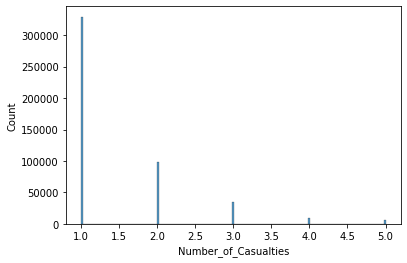

In [40]:
sns.histplot(Train['Number_of_Casualties'])

Data Visualization

In [41]:
def count_plot(df,col,rot=None):
  _=plt.figure(figsize=(8,6))
  _=sns.countplot(x=df[col],order=df[col].value_counts().index)
  _=plt.title(col.capitalize()+" Distribution",fontsize=25)
  _=plt.xlabel(col,fontsize=20)
  _=plt.xticks(fontsize=14,rotation=rot)

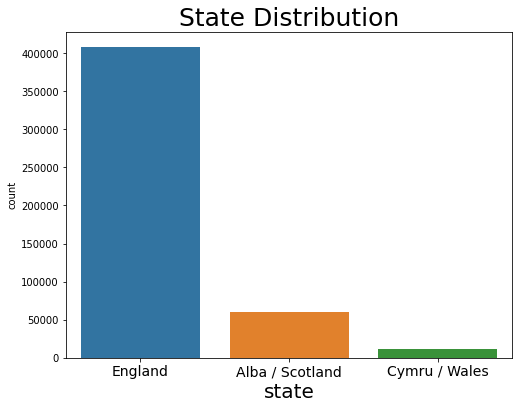

In [42]:
ax=count_plot(Train, col='state')

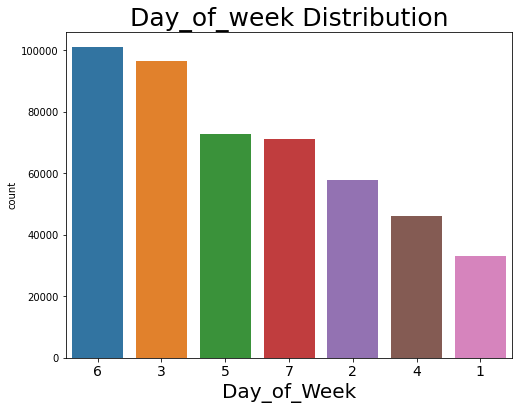

In [43]:
ax=count_plot(Train,col="Day_of_Week")

Changing date format

In [44]:
Train['postcode_1'] = Train['postcode'].str.replace('\d+', '@')
Test['postcode_1'] = Test['postcode'].str.replace('\d+', '@')
Train[['postcode_1','postcode_2']] = Train['postcode_1'].str.split('@',1,expand=True)
Test[['postcode_1','postcode_2']] = Test['postcode_1'].str.split('@',1,expand=True)

Train.drop(columns='postcode_2',inplace=True)
Test.drop(columns='postcode_2',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [45]:
print(len(Train['postcode'].unique()))
print(len(Train['postcode_1'].unique()))

95625
121


In [46]:
train_cols = spark.Index(Train['postcode_1'].unique())
test_cols = spark.Index(Test['postcode_1'].unique()) 
print(test_cols.difference(train_cols))

Index([], dtype='object')


In [47]:
Train['Date'] = spark.to_datetime(Train['Date'])
Test['Date'] = spark.to_datetime(Test['Date'])

Train['qtr'] = Train['Date'].dt.quarter
Train['month'] = Train['Date'].dt.month
Train['dayofweek'] = Train['Date'].dt.dayofweek
Test['qtr'] = Test['Date'].dt.quarter
Test['month'] = Test['Date'].dt.month
Test['dayofweek'] = Test['Date'].dt.dayofweek

In [48]:
Train['Time'] = Train['Time'].str.replace(':','.').astype('float')
Test['Time']  = Test['Time'].str.replace(':','.').astype('float')

In [49]:
cat_col = Train.select_dtypes(include='object').columns

In [50]:
for col in cat_col :
    print(col)
    train_cols = spark.Index(Train[col].unique())
    test_cols = spark.Index(Test[col].unique()) 
    print(test_cols.difference(train_cols))

Local_Authority_(Highway)
Index([], dtype='object')
Road_Type
Index([], dtype='object')
Pedestrian_Crossing-Human_Control
Index([], dtype='object')
Pedestrian_Crossing-Physical_Facilities
Index([], dtype='object')
Light_Conditions
Index([], dtype='object')
Weather_Conditions
Index([], dtype='object')
Road_Surface_Conditions
Index([], dtype='object')
Special_Conditions_at_Site
Index([], dtype='object')
Carriageway_Hazards
Index([], dtype='object')
Did_Police_Officer_Attend_Scene_of_Accident
Index([], dtype='object')
state
Index([], dtype='object')
postcode
Index(['AB10 1TT', 'AB10 6LQ', 'AB11 5PA', 'AB15 4TN', 'AB15 8SP', 'AB21 7AS',
       'AB21 7PQ', 'AB21 9BE', 'AB24 5LN', 'AB25 1SJ',
       ...
       'YO61 1LR', 'YO61 3AF', 'YO62 6DG', 'YO62 6RA', 'YO7 1PY', 'YO7 4JY',
       'YO7 4NE', 'YO8 5AS', 'YO8 5RS', 'ZE2 9RJ'],
      dtype='object', length=4064)
country
Index([], dtype='object')
postcode_1
Index([], dtype='object')


In [53]:
pip install feature-engine

     |████████████████████████████████| 205 kB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 538 kB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [54]:
from feature_engine.encoding import RareLabelEncoder

encoder = RareLabelEncoder(tol=0.000003, n_categories=2, 
                           variables='postcode',
                           replace_with='Rare')

Train  = encoder.fit_transform(Train)
Test  = encoder.transform(Test)

In [55]:
train_cols = spark.Index(Train['postcode'].unique())
test_cols = spark.Index(Test['postcode'].unique()) 
print(test_cols.difference(train_cols))

Index([], dtype='object')


Creating new features

In [56]:
def agg_function(featuer,agg_featuer,Train,Test):
    agg_featuers = Train.groupby([featuer]).agg({agg_featuer: ['count']})
    agg_featuers.columns = [featuer + '_'.join(c).strip('_') for c in agg_featuers.columns]
    Train = Train.merge(agg_featuers, on = [featuer], how='left');
    Test = Test.merge(agg_featuers, on = [featuer], how='left');
    return (Train,Test)

for col in Train.select_dtypes(include='object').columns:
    Train,Test = agg_function(col,'country',Train,Test)

In [57]:
def agg_function(featuer,agg_featuer,Train,Test):
    agg_featuers = Train.groupby([featuer]).agg({agg_featuer: ['mean']})
    agg_featuers.columns = [featuer + '_'.join(c).strip('_') for c in agg_featuers.columns]
    Train = Train.merge(agg_featuers, on = [featuer], how='left');
    Test = Test.merge(agg_featuers, on = [featuer], how='left');
    return (Train,Test)

Train,Test = agg_function('postcode_1','Number_of_Casualties',Train,Test)
Train,Test = agg_function('postcode_1','Local_Authority_(District)',Train,Test)
Train,Test = agg_function('Local_Authority_(Highway)','Local_Authority_(District)',Train,Test)
Train,Test = agg_function('postcode','Local_Authority_(District)',Train,Test)

In [58]:
print(Train.columns[Train.isnull().any()])
print(Test.columns[Test.isnull().any()])

Index(['Time'], dtype='object')
Index(['Time'], dtype='object')


In [59]:
Train['Time'] = Train['Time'].round(0).astype('str')
Test['Time'] = Test['Time'].round(0).astype('str')
Train['Time'].fillna('Missing',inplace=True)
Test['Time'].fillna('Missing',inplace=True)

In [60]:
def agg_function(featuer,agg_featuer,Train,Test):
    agg_featuers = Train.groupby([featuer]).agg({agg_featuer: ['count','mean']})
    agg_featuers.columns = [featuer + '_'.join(c).strip('_') for c in agg_featuers.columns]
    Train = Train.merge(agg_featuers, on = [featuer], how='left');
    Test = Test.merge(agg_featuers, on = [featuer], how='left');
    return (Train,Test)

In [61]:
Train,Test = agg_function('Time','Number_of_Casualties',Train,Test)
Train,Test = agg_function('Day_of_Week','Number_of_Casualties',Train,Test)
Train,Test = agg_function('month','Number_of_Casualties',Train,Test)
Train,Test = agg_function('qtr','Number_of_Casualties',Train,Test)
Train,Test = agg_function('1st_Road_Class','Number_of_Casualties',Train,Test)
Train,Test = agg_function('Number_of_Vehicles','Speed_limit',Train,Test)

In [62]:
print(Train.columns[Train.isnull().any()])
print(Test.columns[Test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


Displaying all features

In [63]:

Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478741 entries, 0 to 478740
Data columns (total 61 columns):
 #   Column                                                    Non-Null Count   Dtype         
---  ------                                                    --------------   -----         
 0   Accident_ID                                               478741 non-null  int64         
 1   Police_Force                                              478741 non-null  int64         
 2   Number_of_Vehicles                                        478741 non-null  int64         
 3   Number_of_Casualties                                      478741 non-null  int64         
 4   Date                                                      478741 non-null  datetime64[ns]
 5   Day_of_Week                                               478741 non-null  int64         
 6   Time                                                      478741 non-null  object        
 7   Local_Authority_(District)   

In [64]:
Train.drop(columns=[],inplace=True)
Test.drop(columns=[],inplace=True)

In [65]:
Y = Train['Number_of_Casualties']

In [66]:
Train.drop(columns=['Accident_ID','Date','country','2nd_Road_Number','postcode_1',
                    'Time','Number_of_Casualties','postcode','Local_Authority_(Highway)',
                    'Road_Type','Pedestrian_Crossing-Human_Control',
                    'Pedestrian_Crossing-Physical_Facilities','Light_Conditions',
                    'Weather_Conditions','Road_Surface_Conditions',
                    'Special_Conditions_at_Site','Carriageway_Hazards',
                    'Did_Police_Officer_Attend_Scene_of_Accident','state',],inplace=True)

Test.drop(columns=['Accident_ID','Date','country','2nd_Road_Number','postcode_1',
                   'Time','Number_of_Casualties','postcode','Local_Authority_(Highway)',
                   'Road_Type','Pedestrian_Crossing-Human_Control',
                   'Pedestrian_Crossing-Physical_Facilities','Light_Conditions',
                   'Weather_Conditions','Road_Surface_Conditions',
                   'Special_Conditions_at_Site','Carriageway_Hazards',
                   'Did_Police_Officer_Attend_Scene_of_Accident','state',],inplace=True)

Heat Map

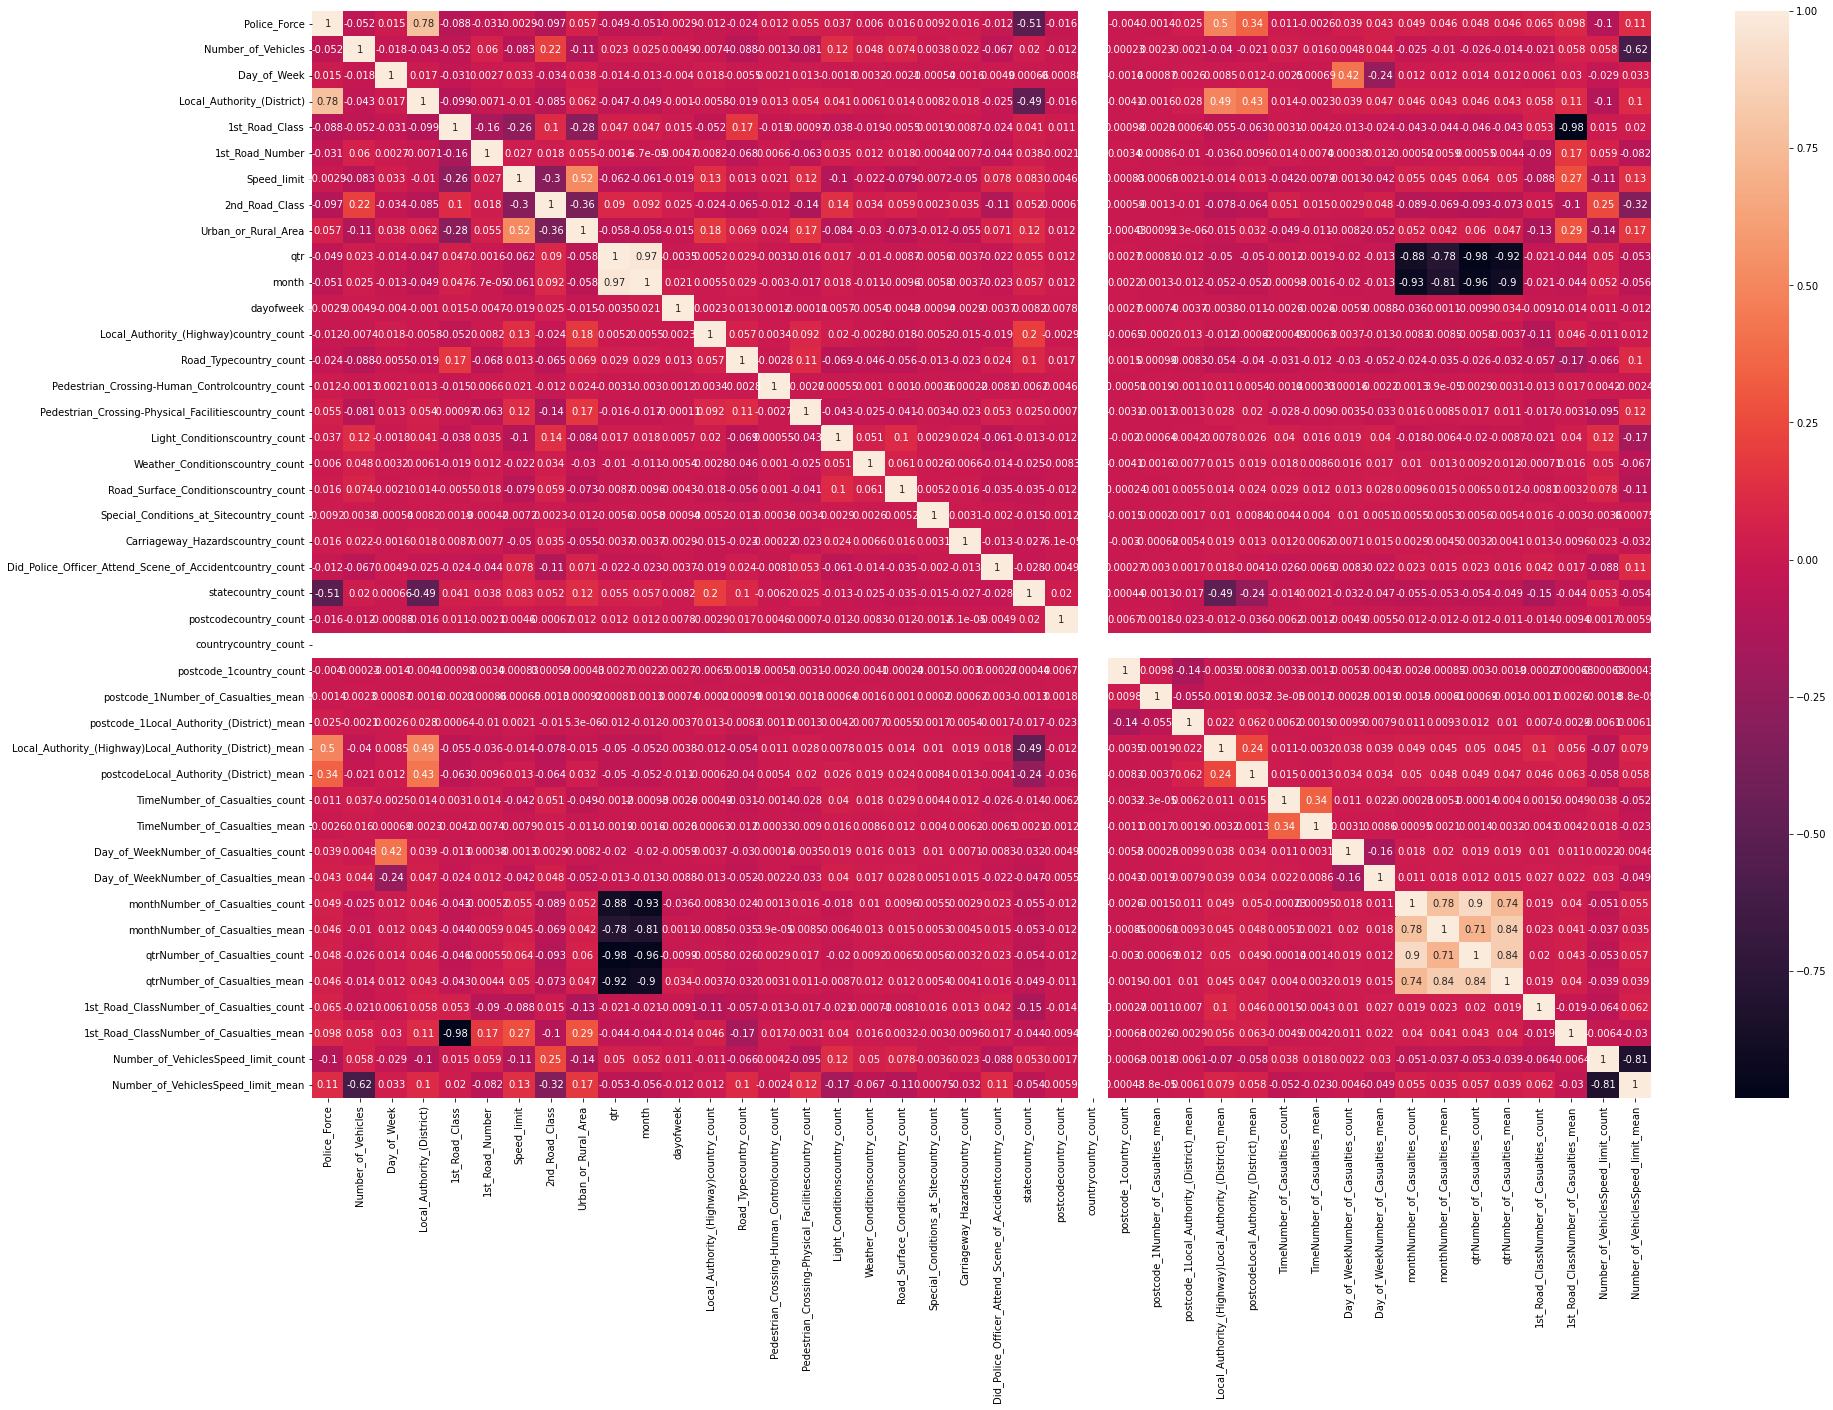

In [67]:
plt.figure(figsize=(30,20))
sns.heatmap(Train.corr(),annot=True)

Histograms of all features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


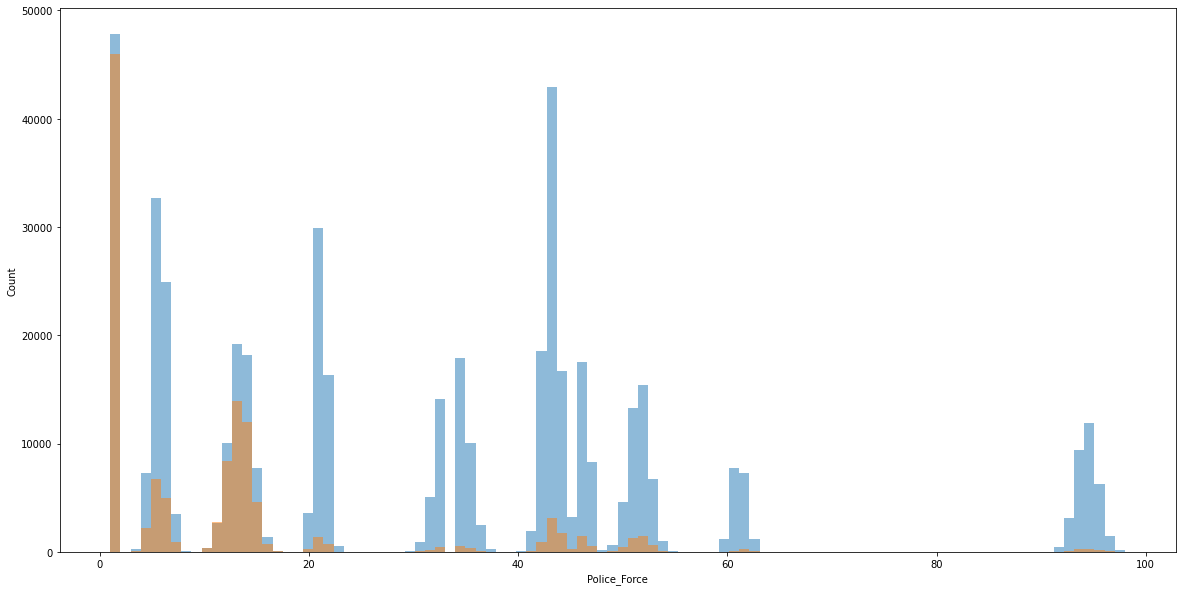

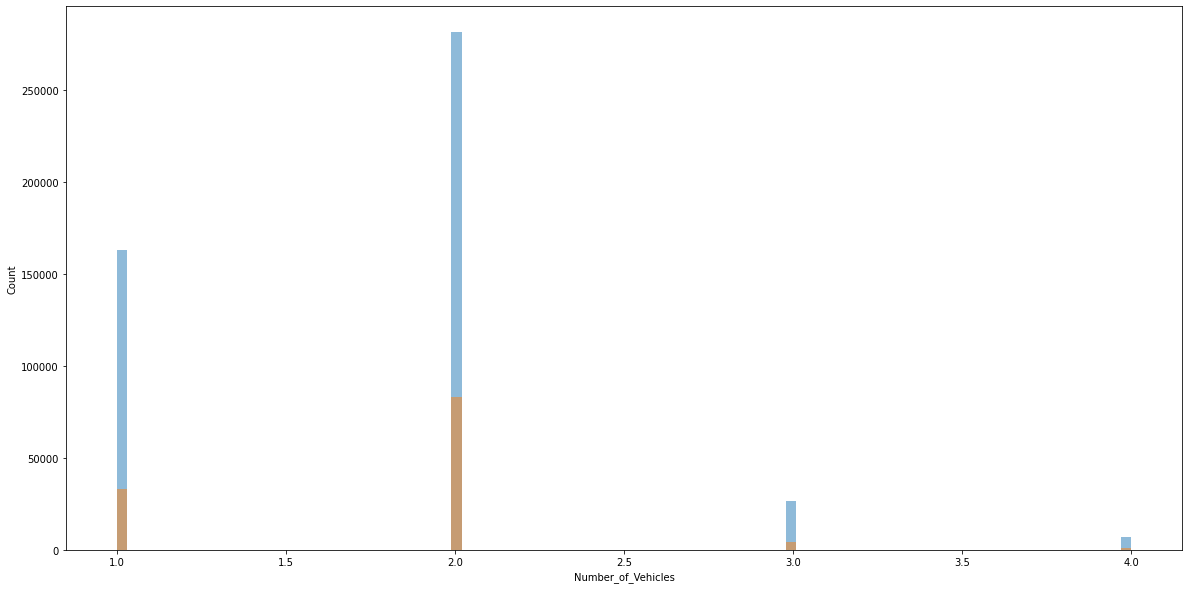

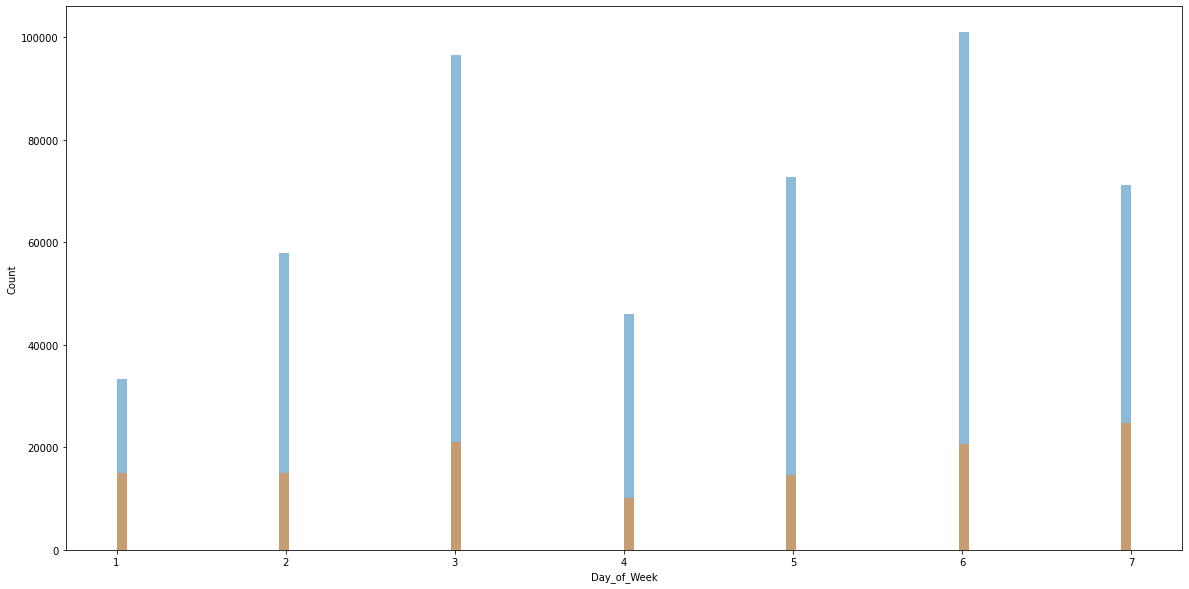

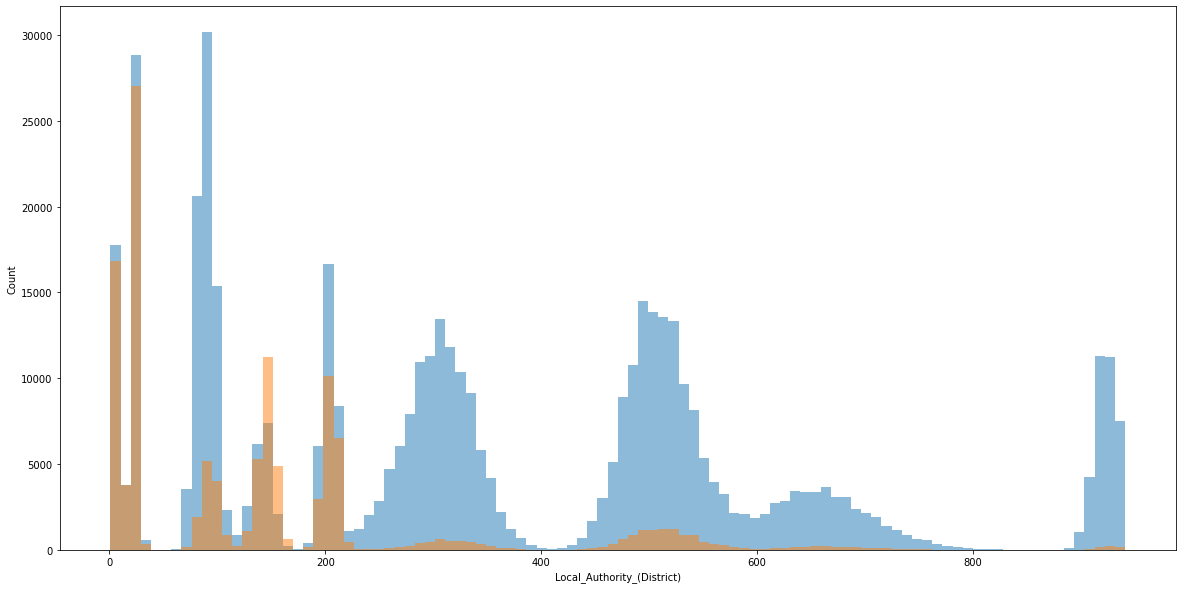

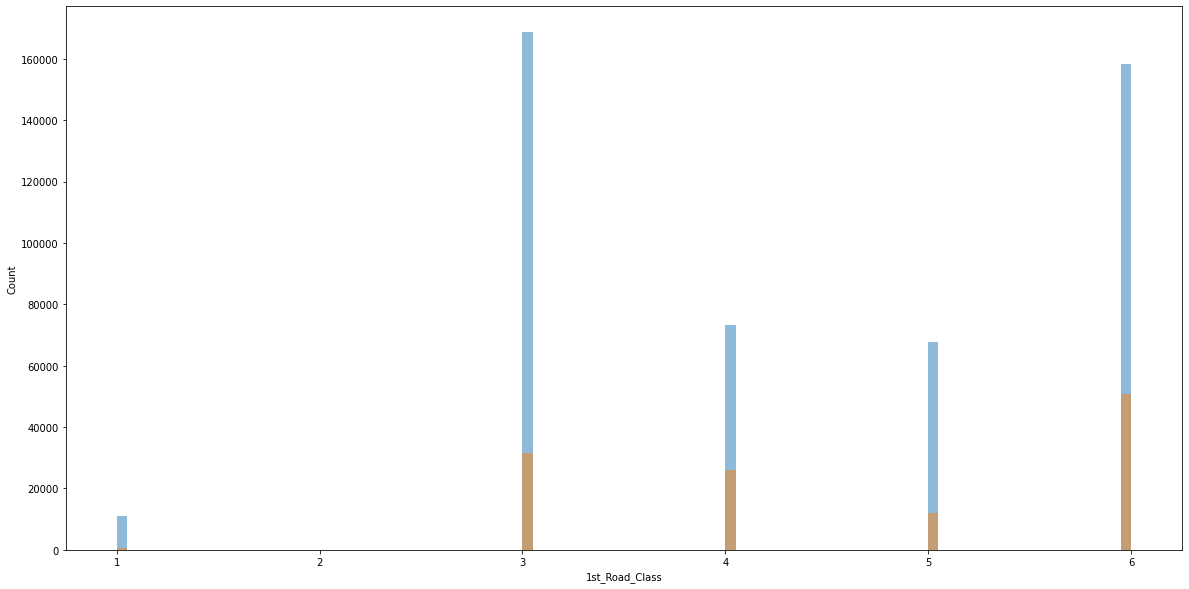

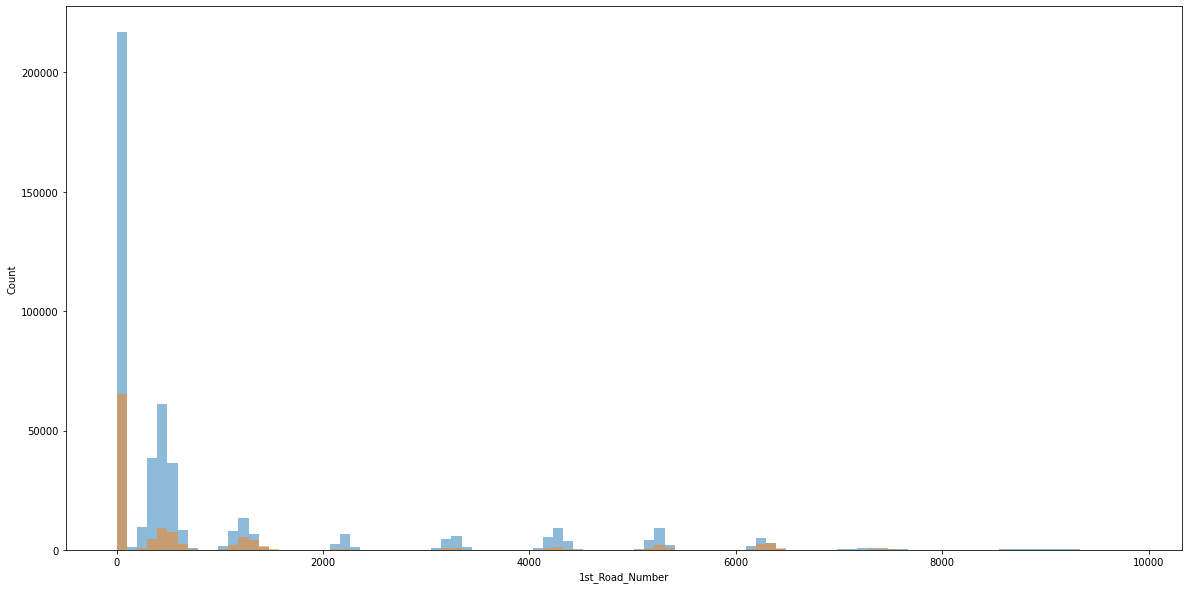

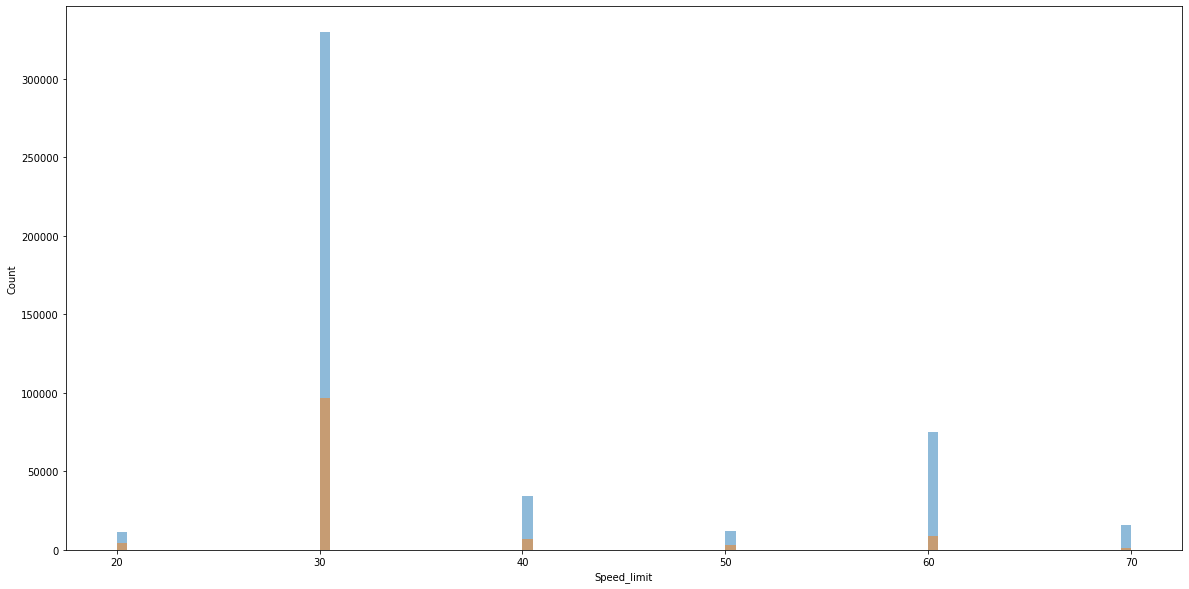

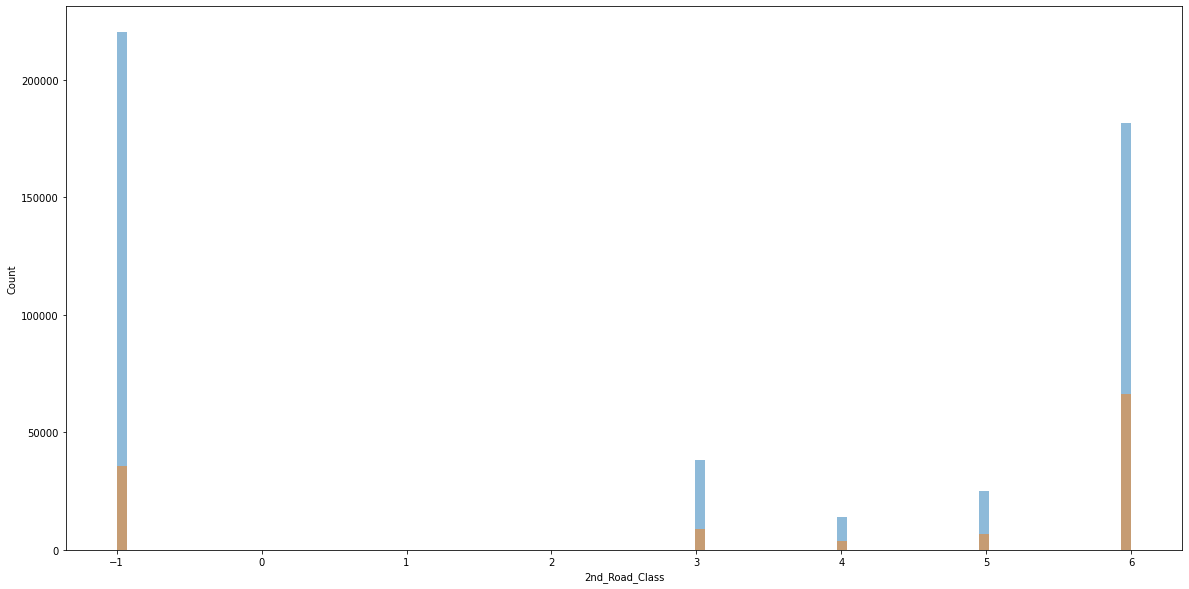

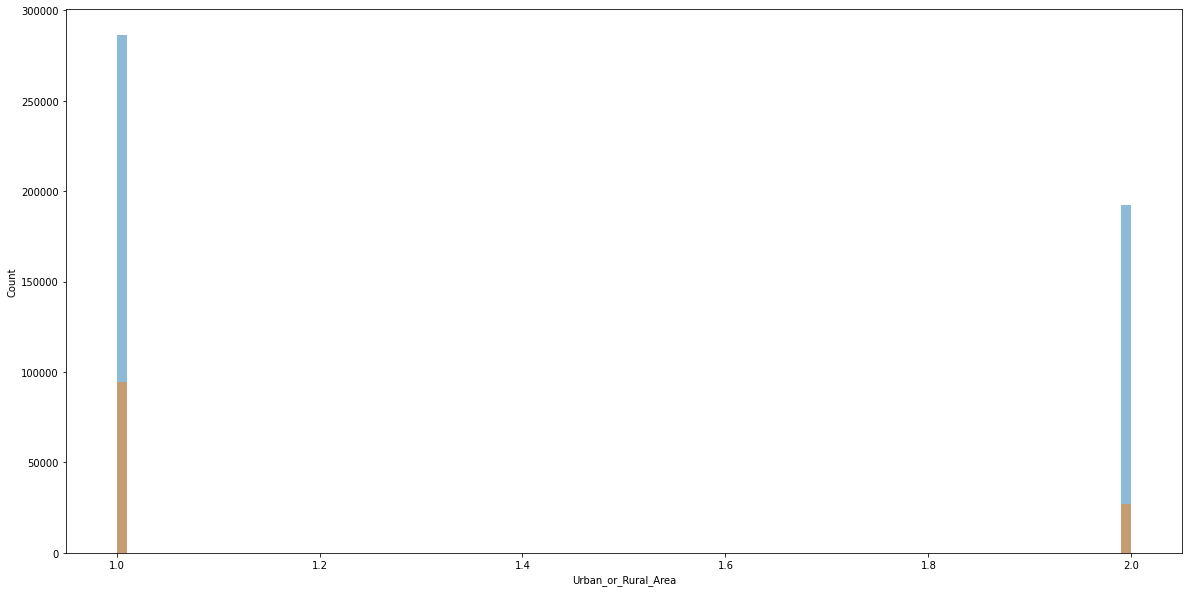

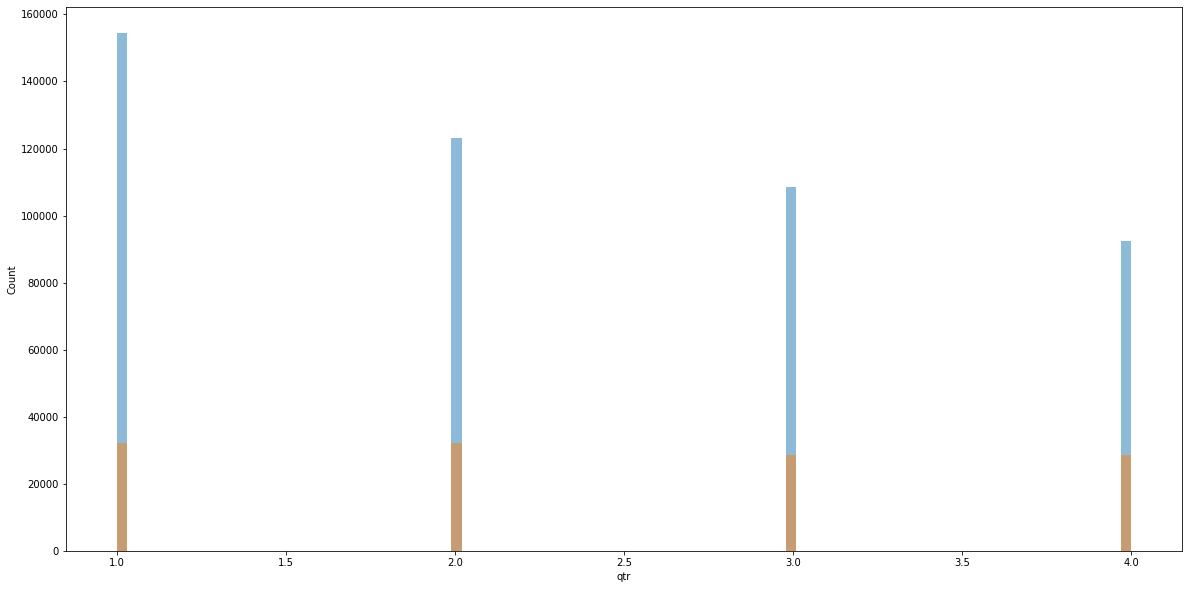

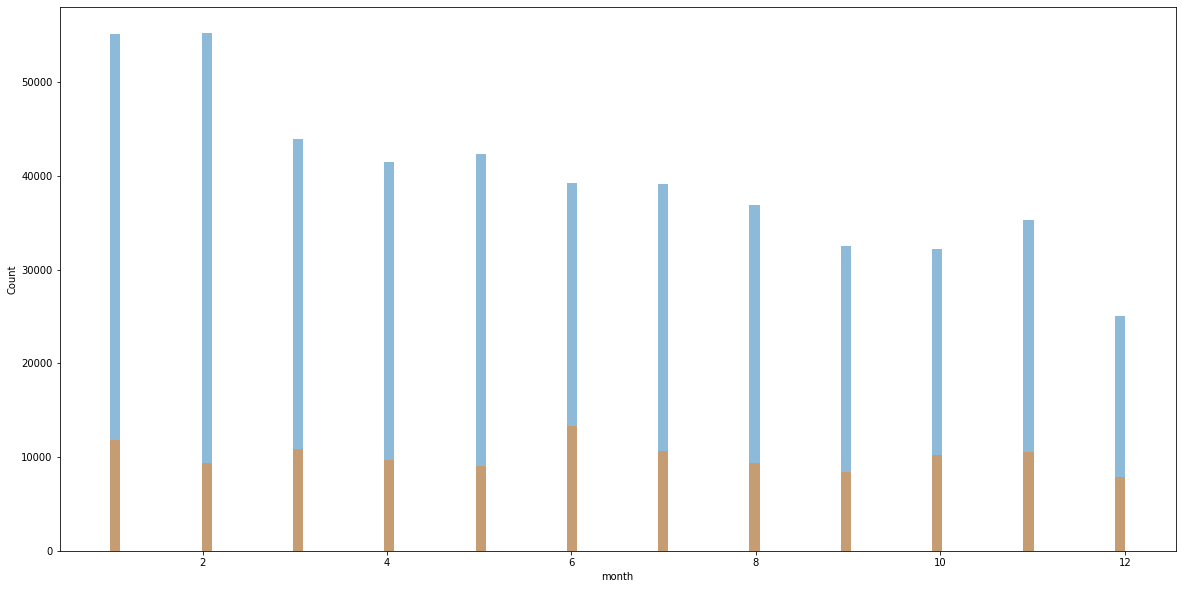

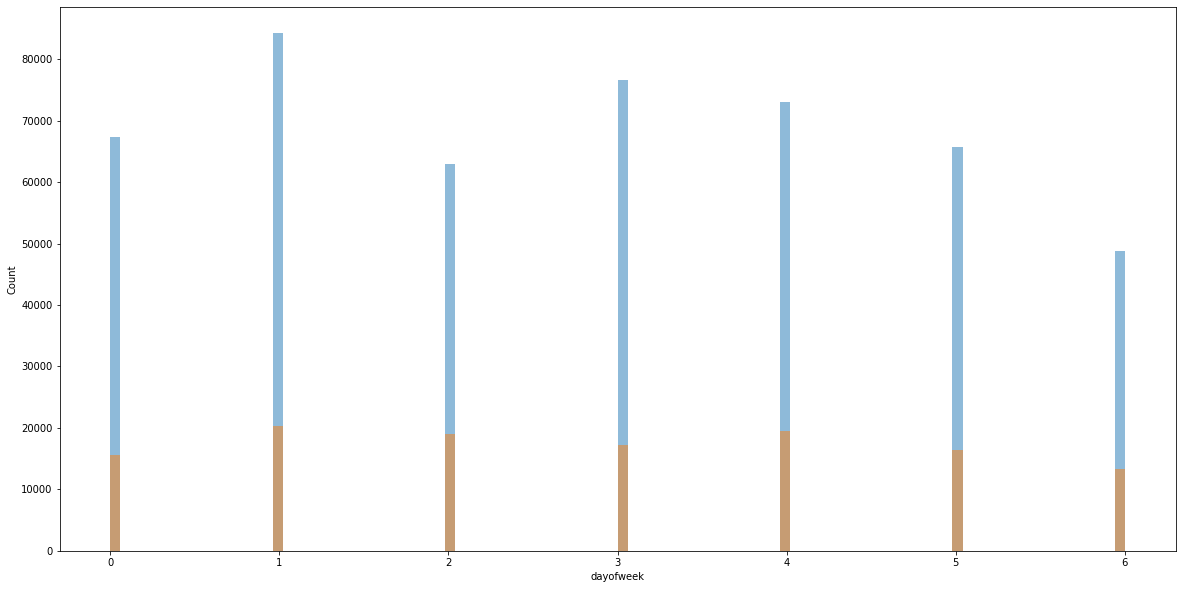

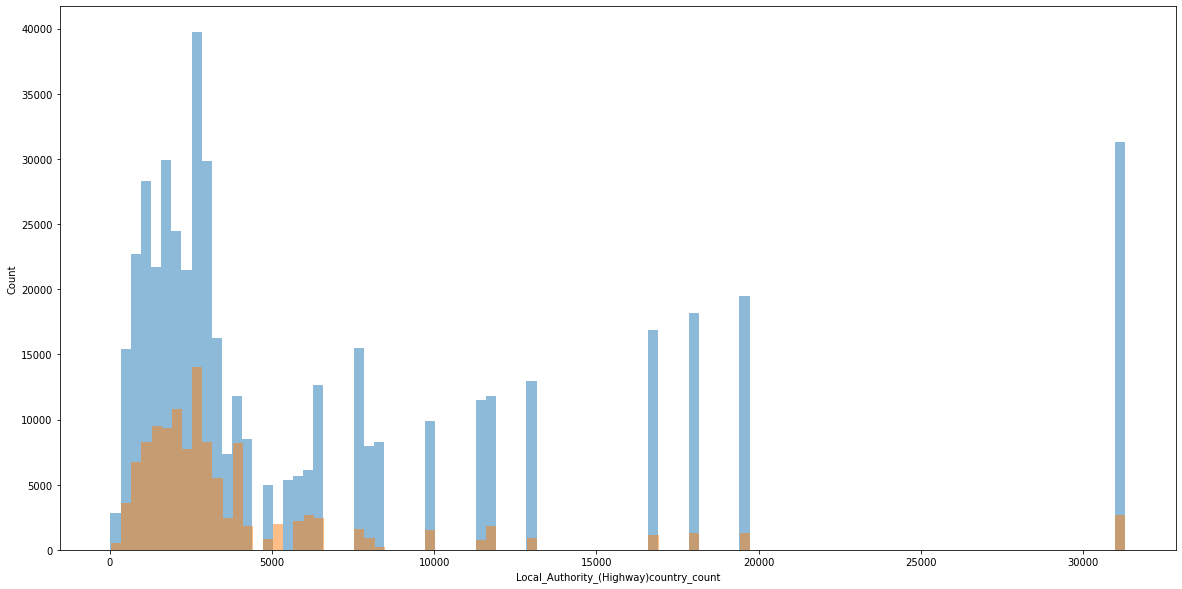

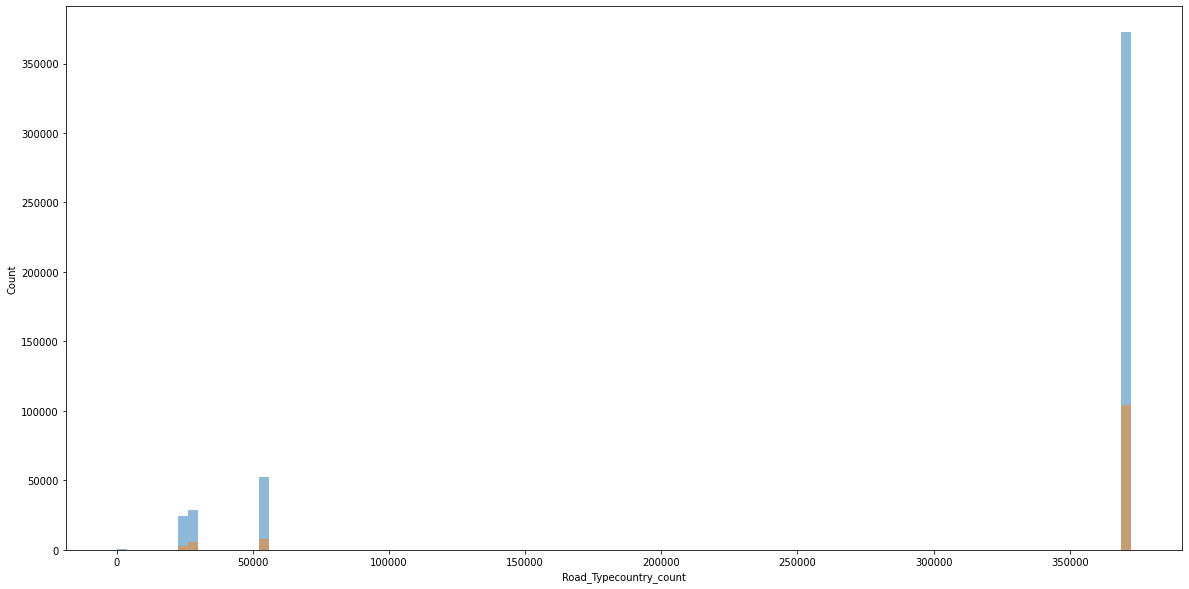

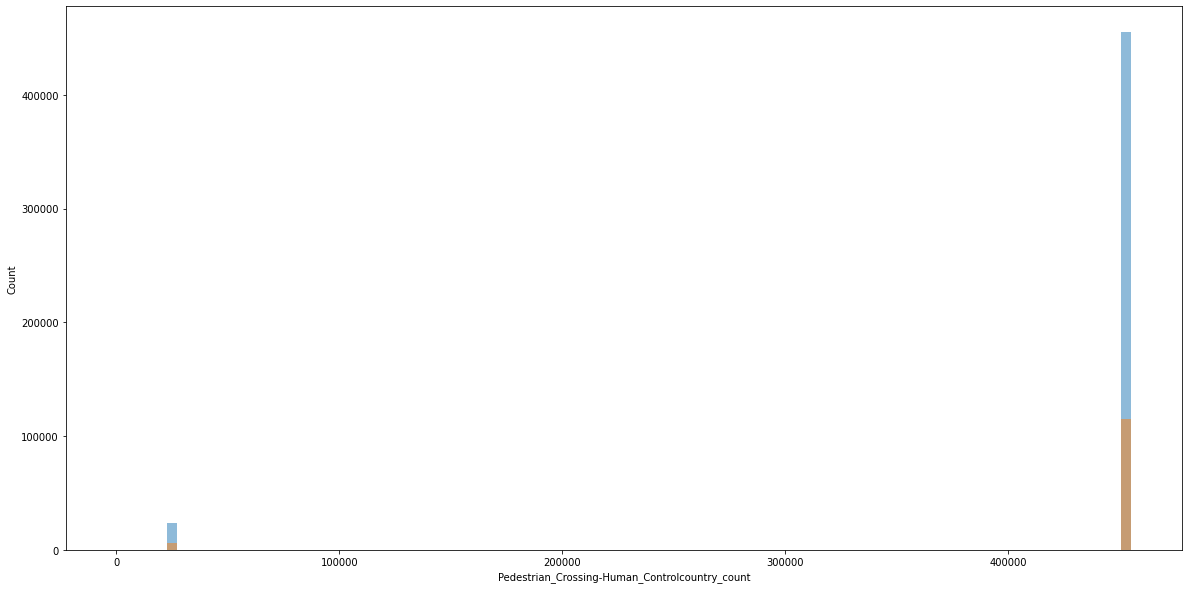

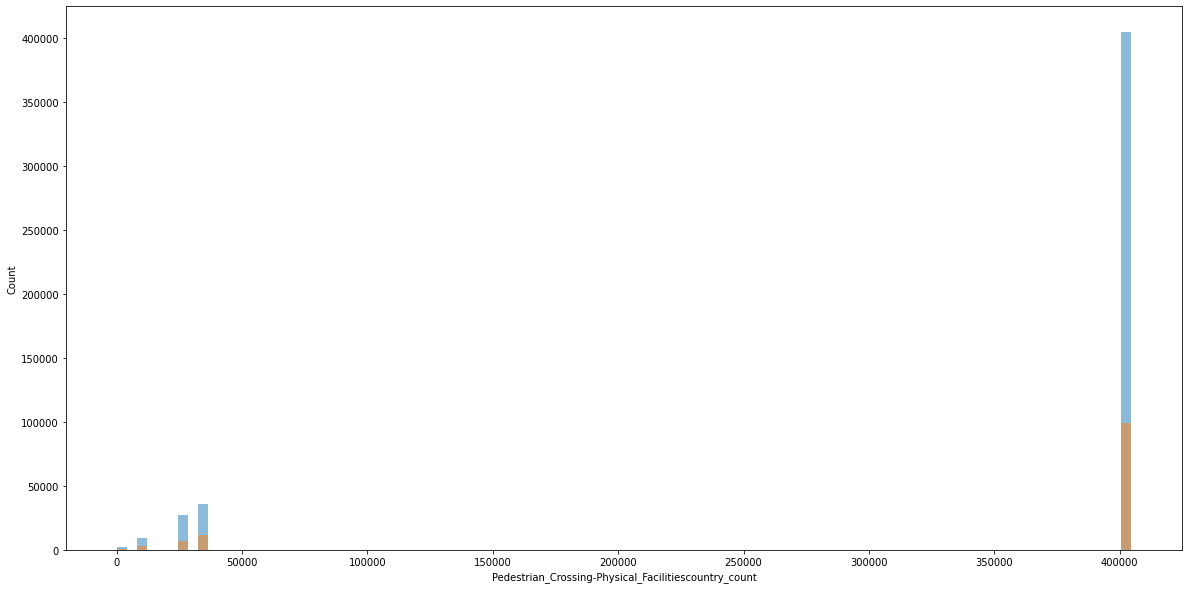

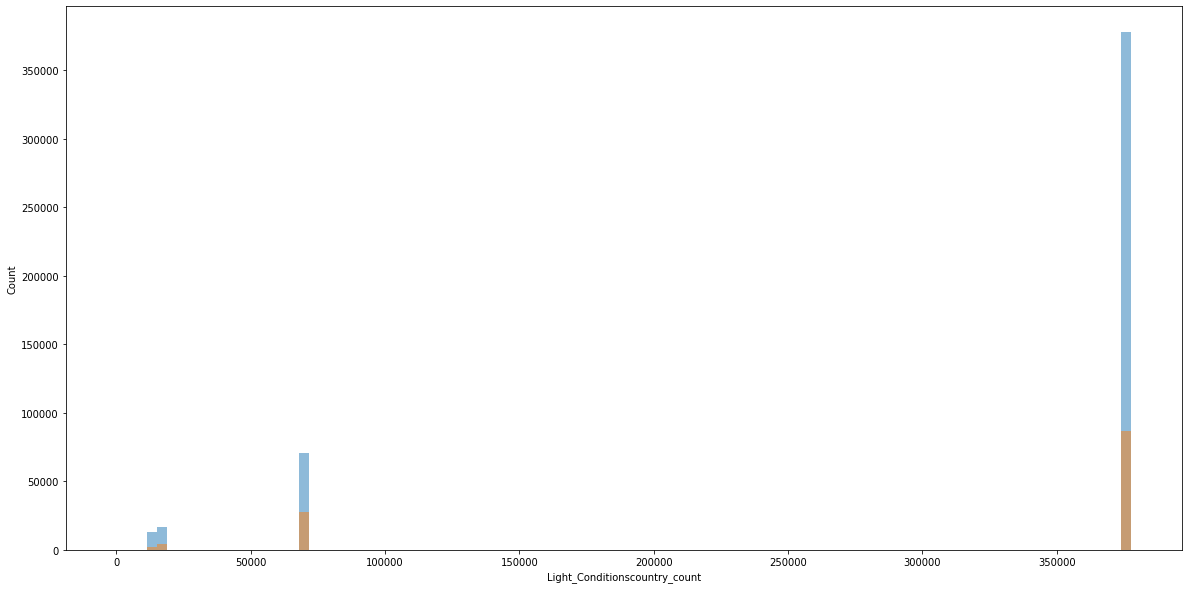

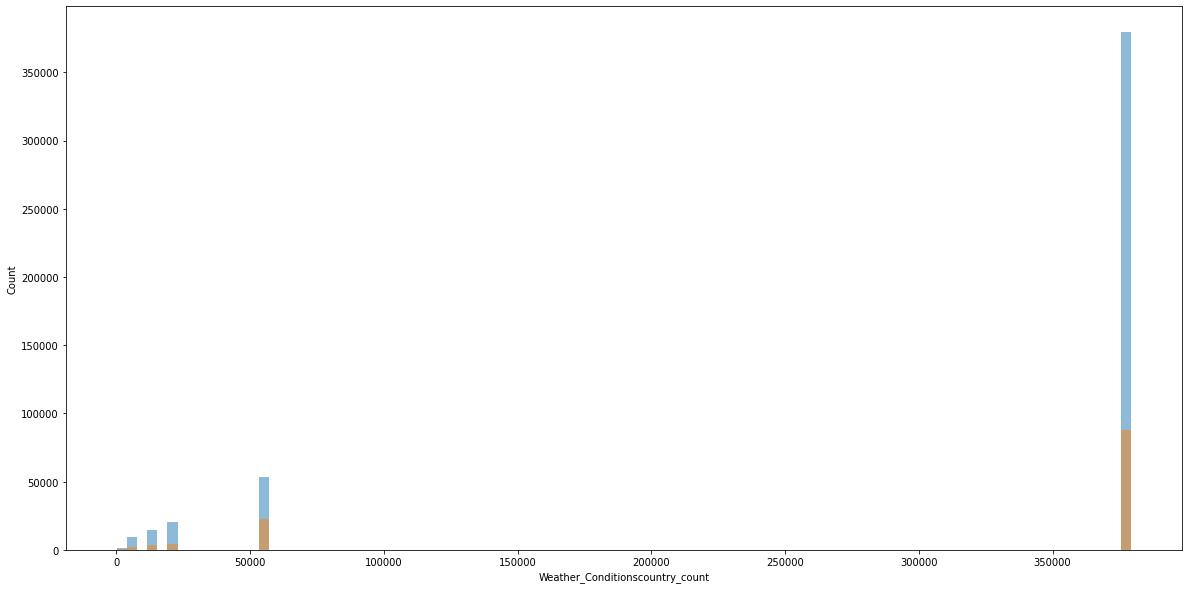

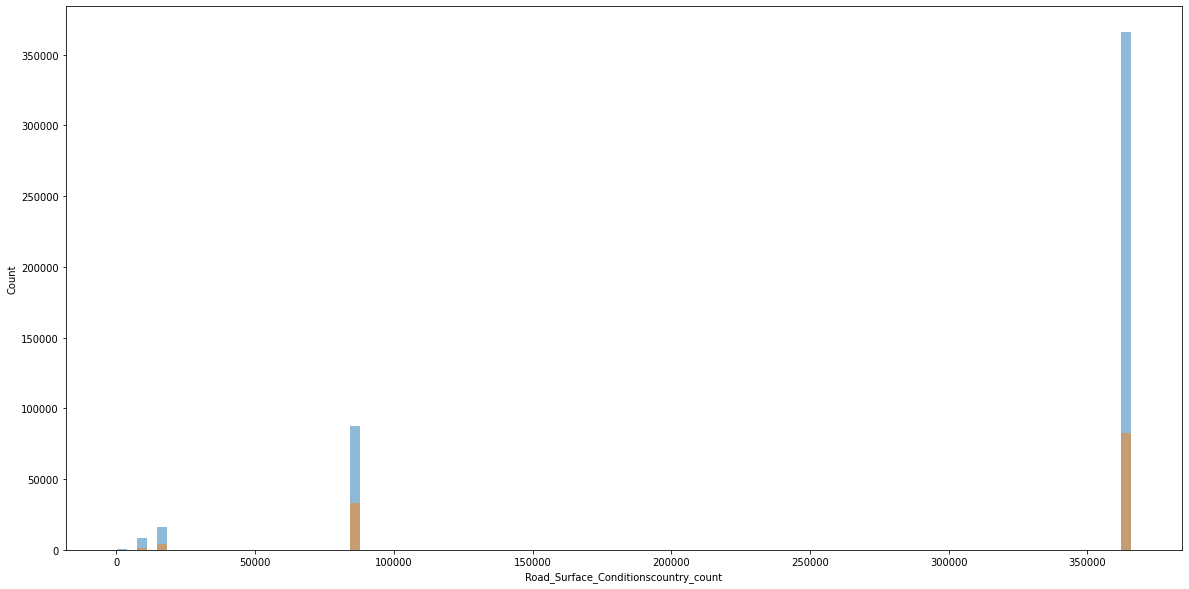

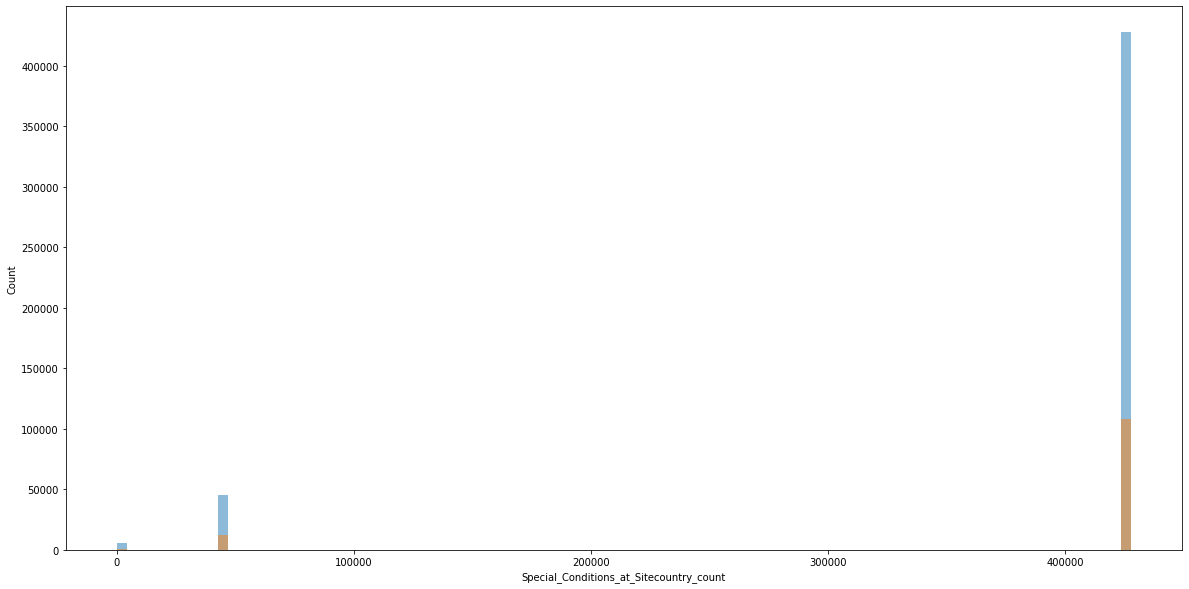

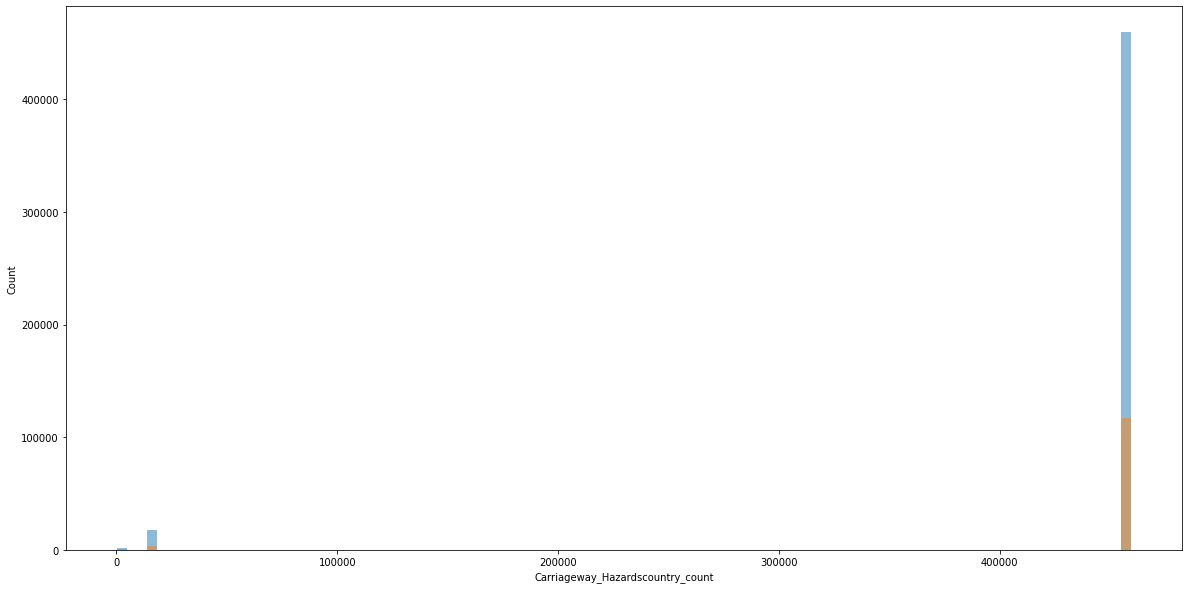

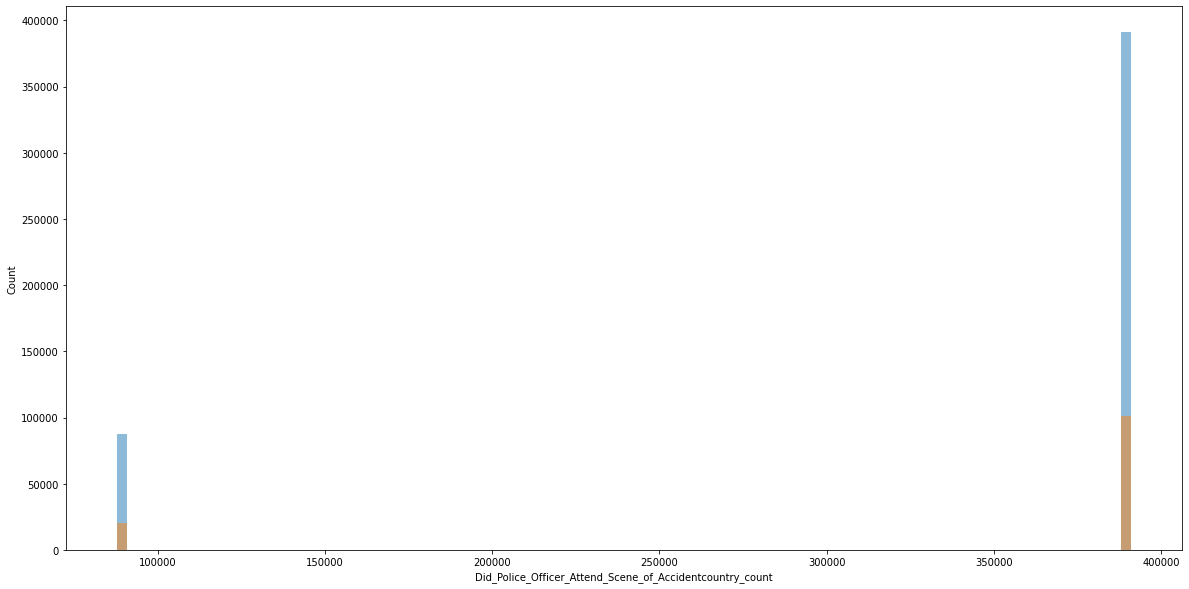

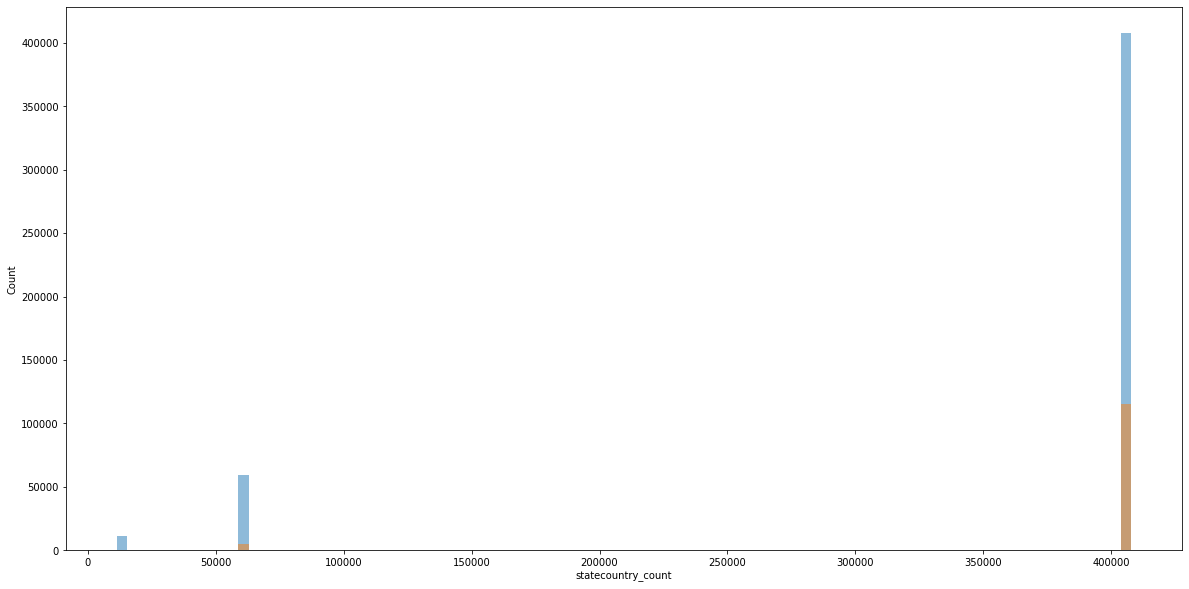

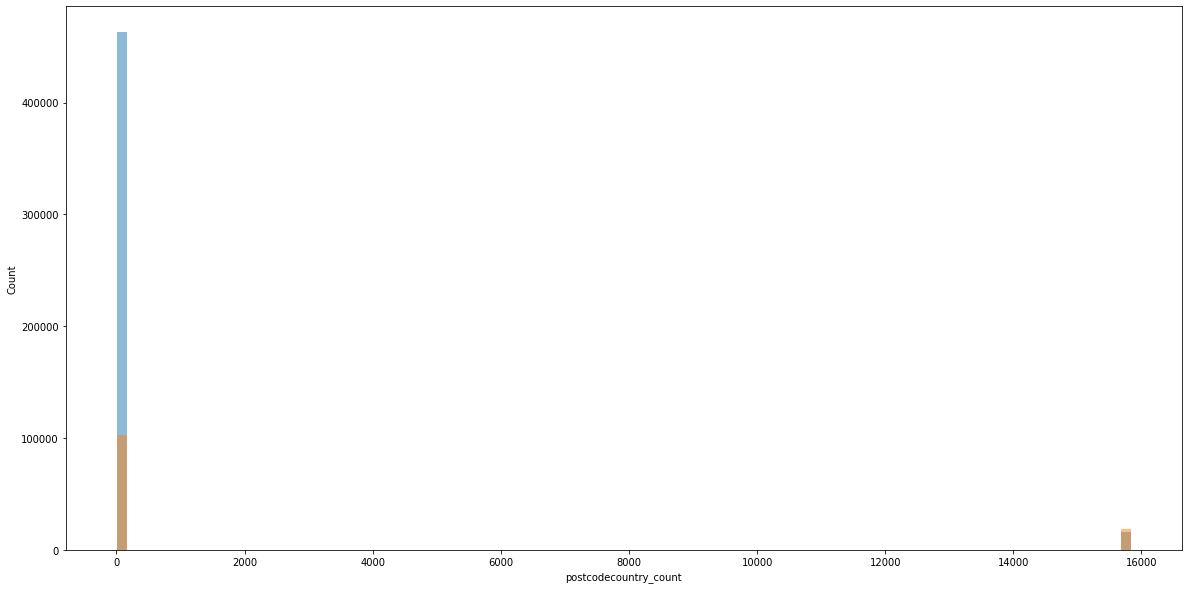

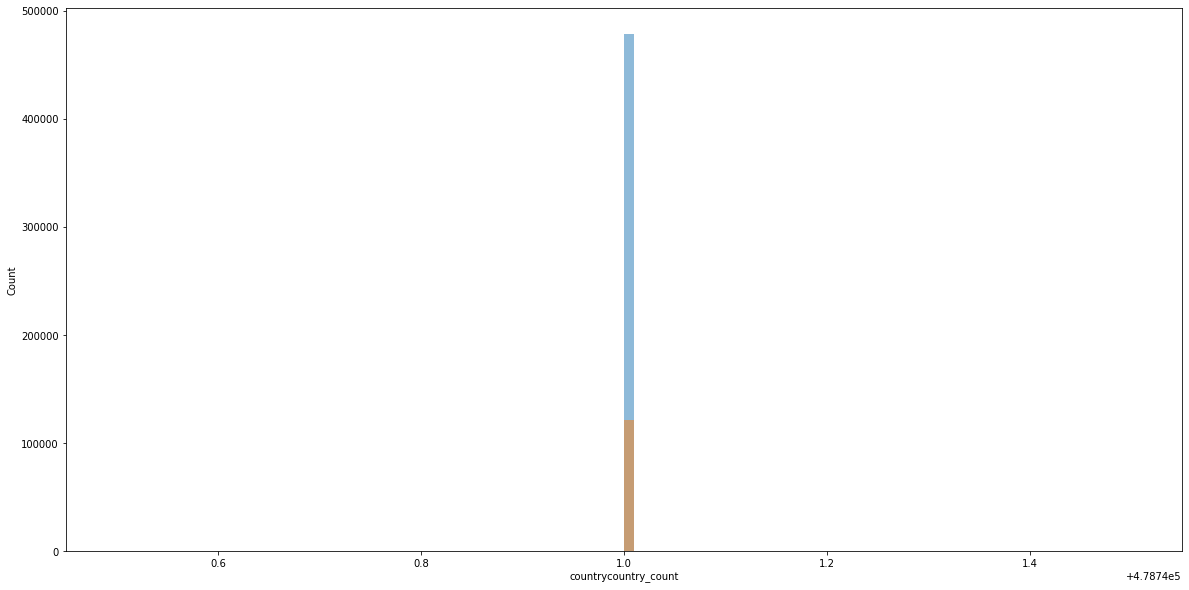

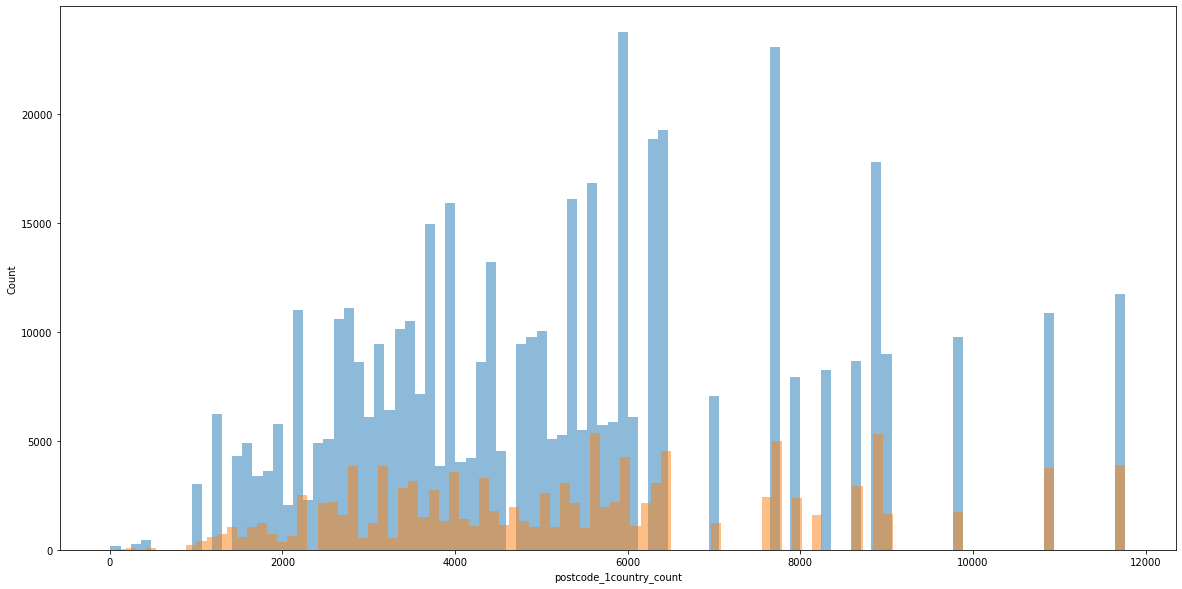

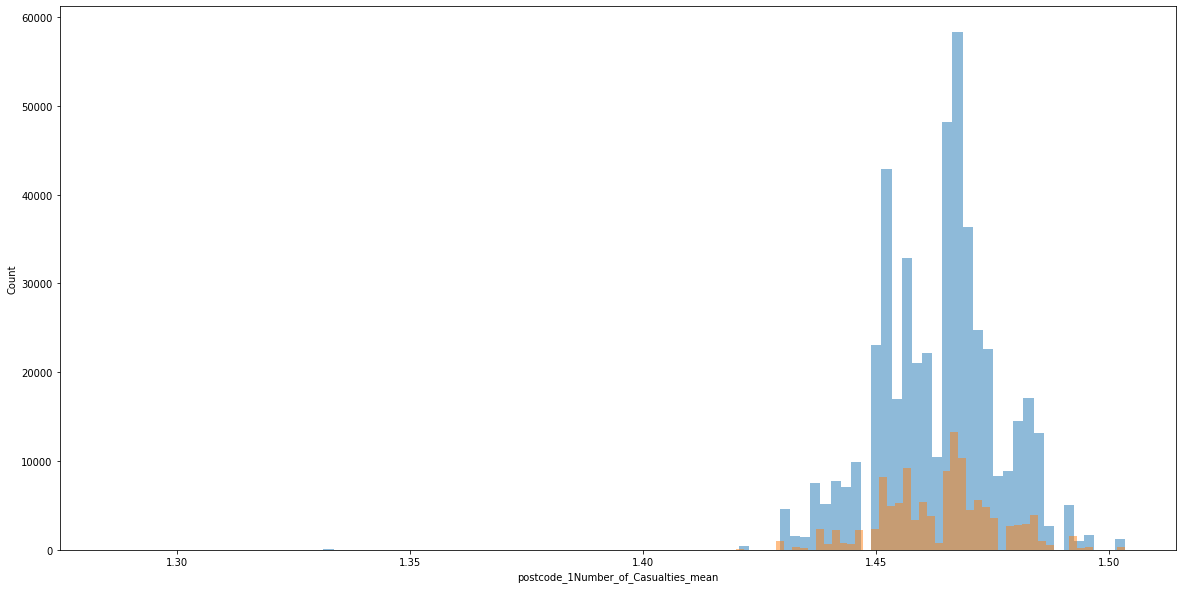

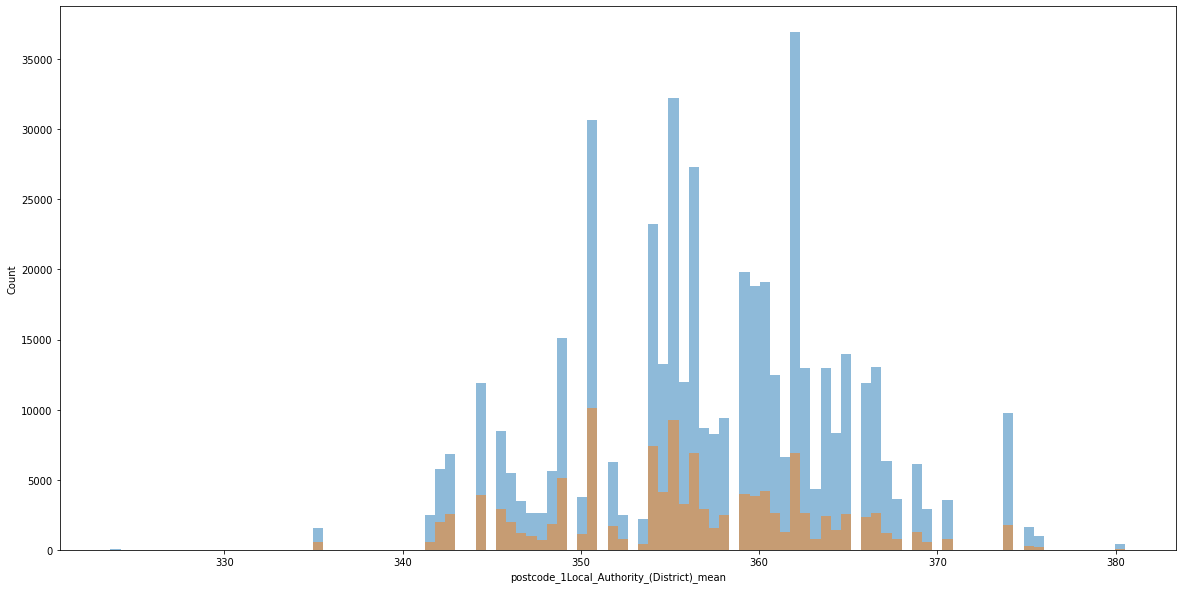

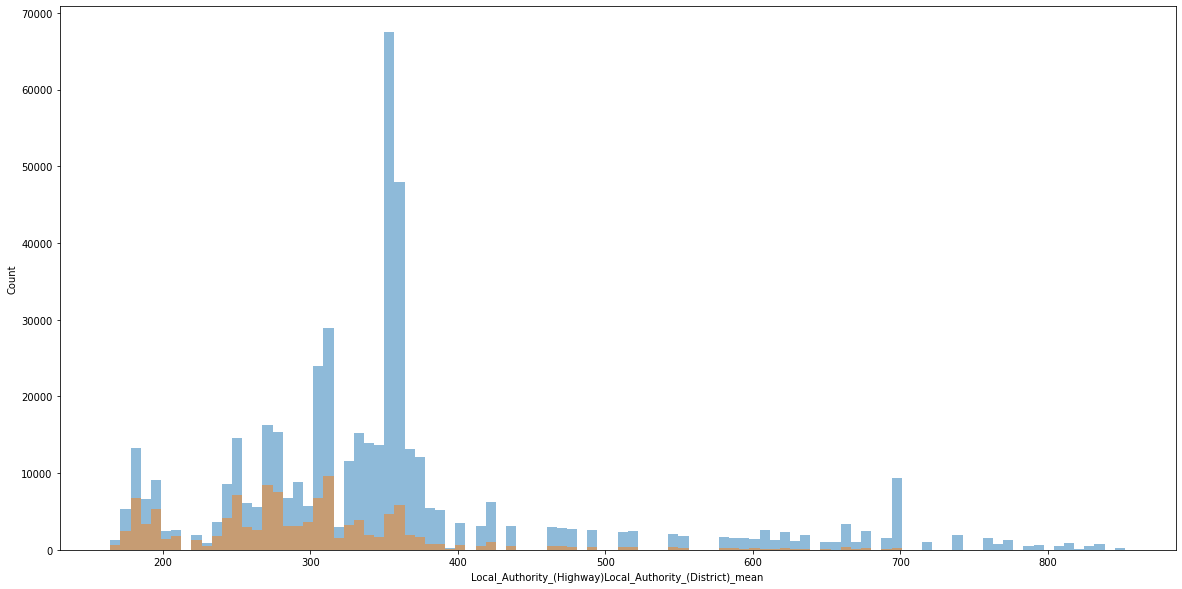

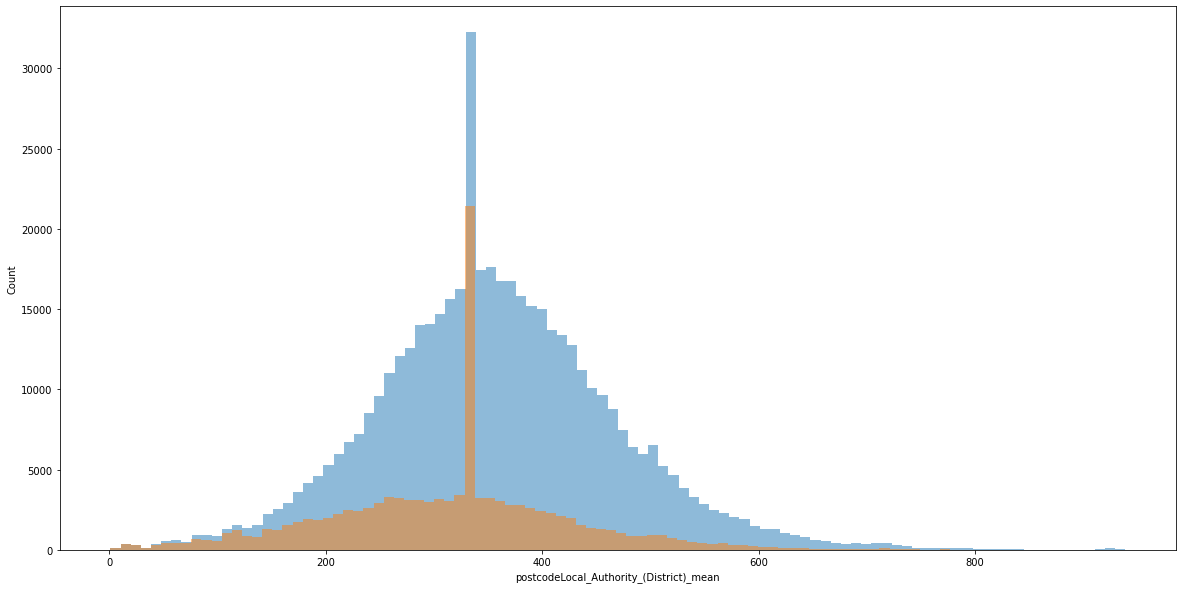

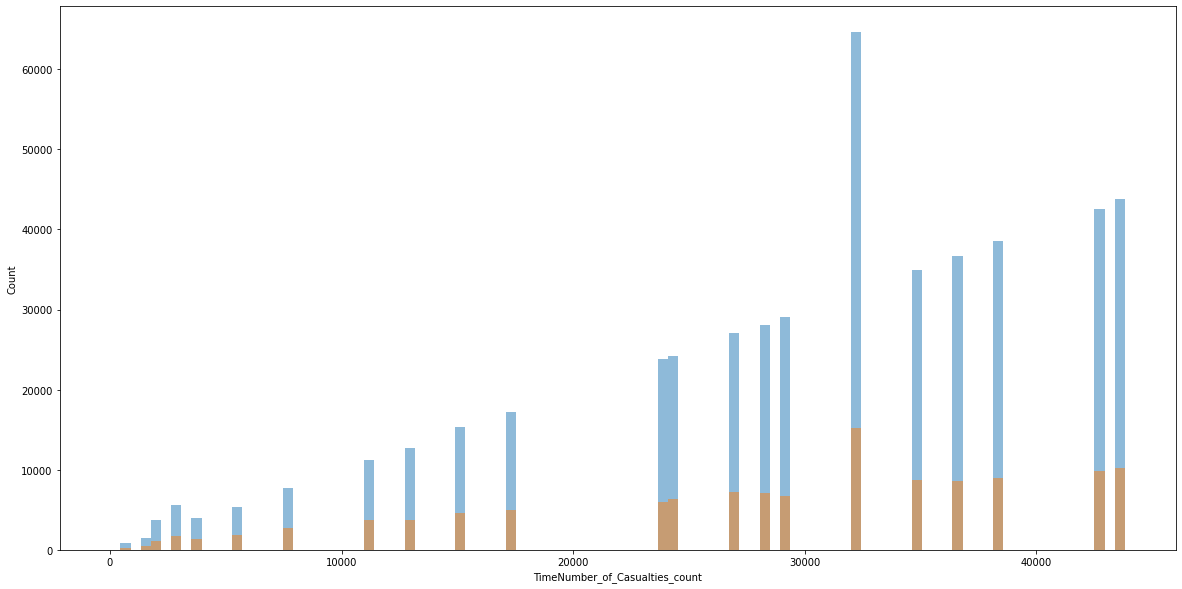

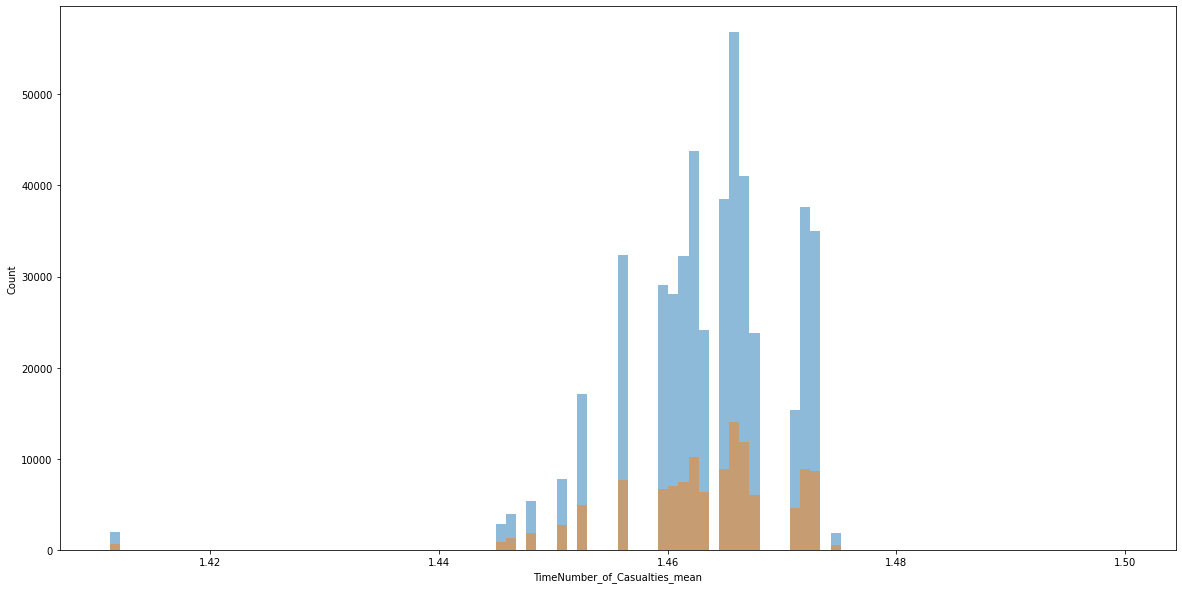

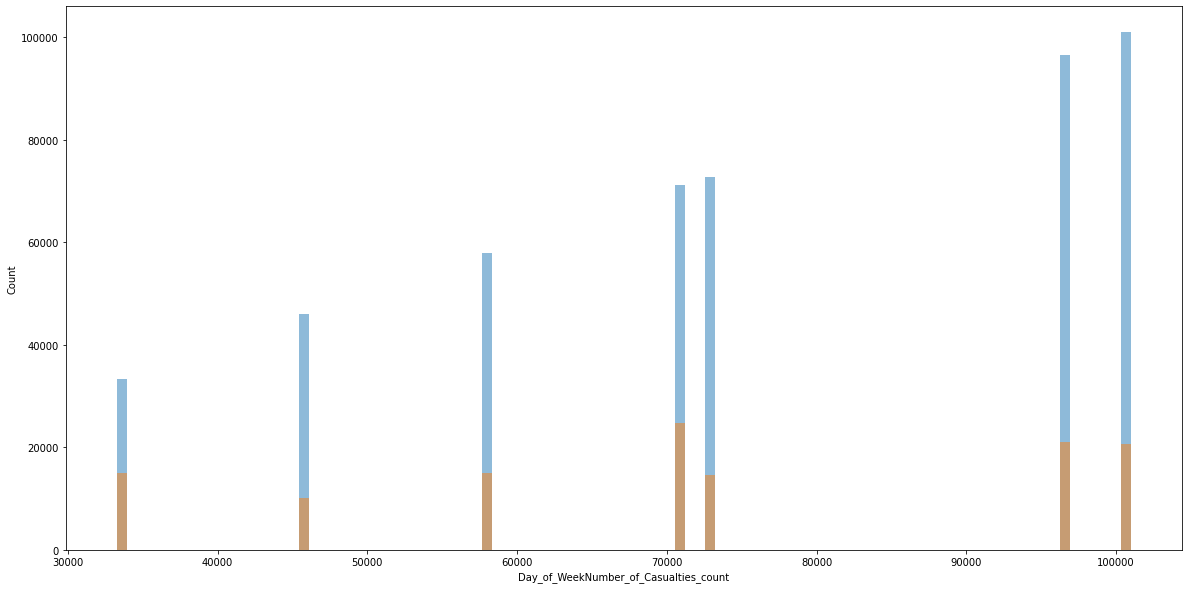

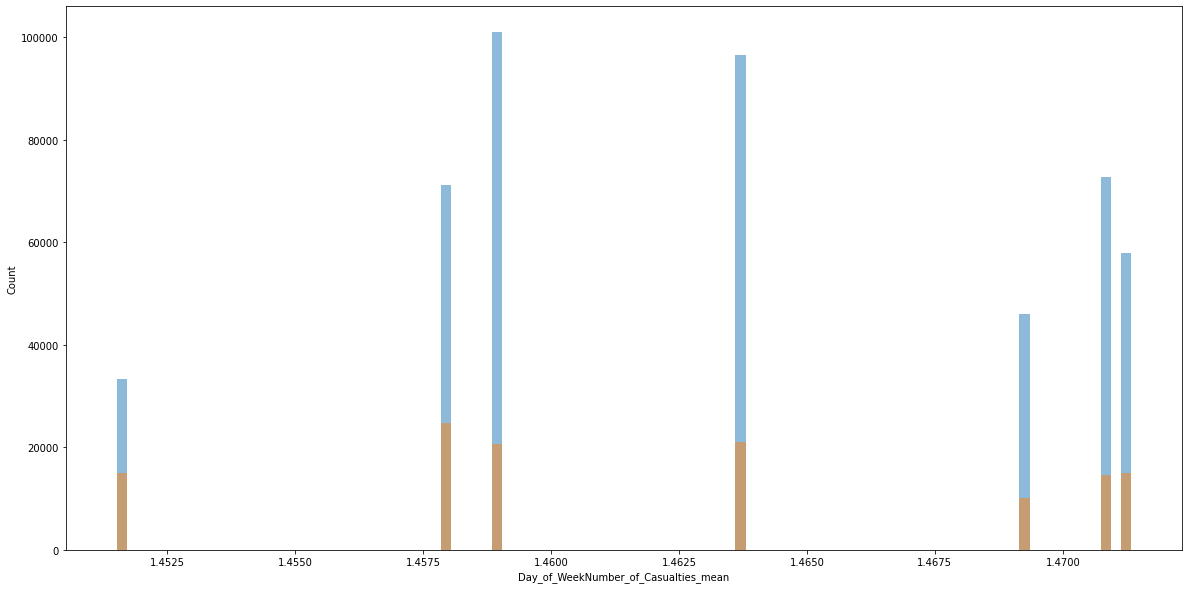

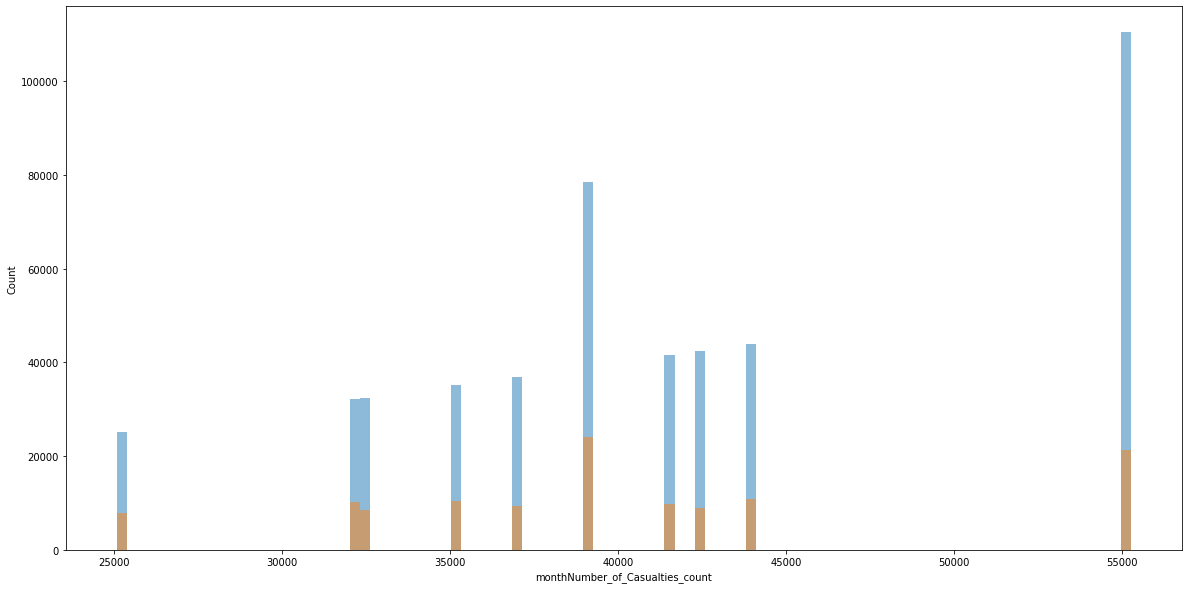

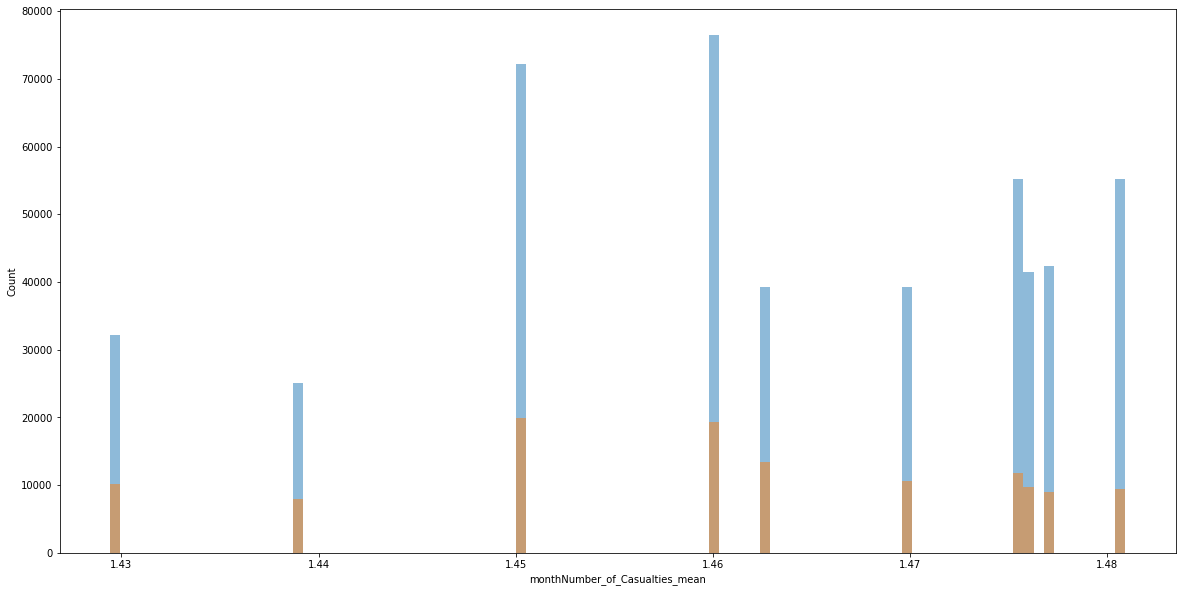

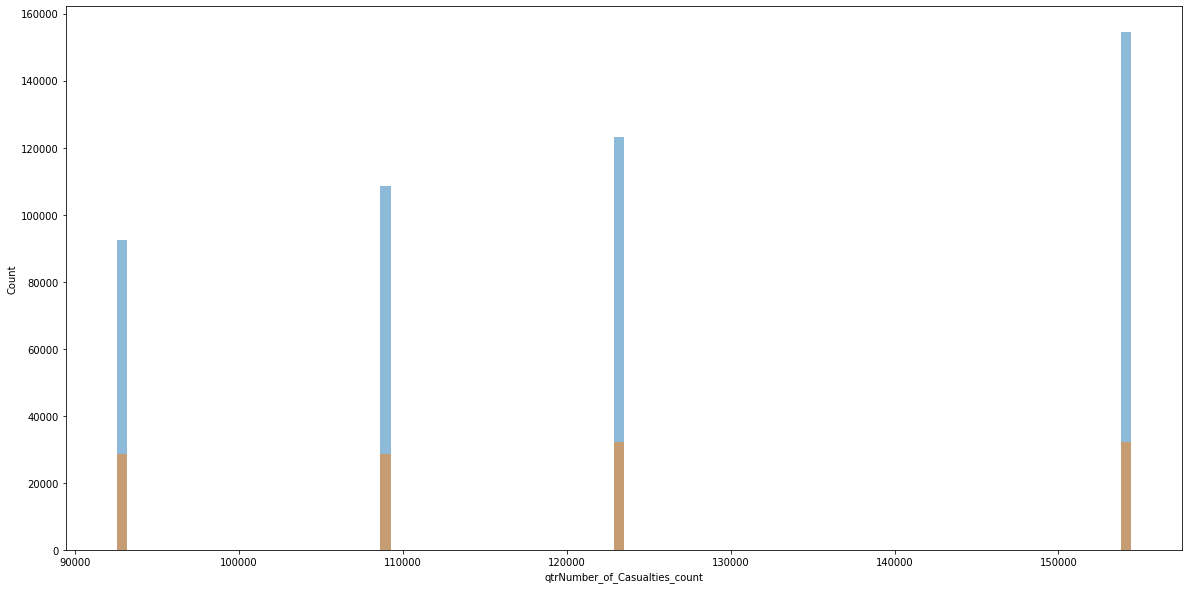

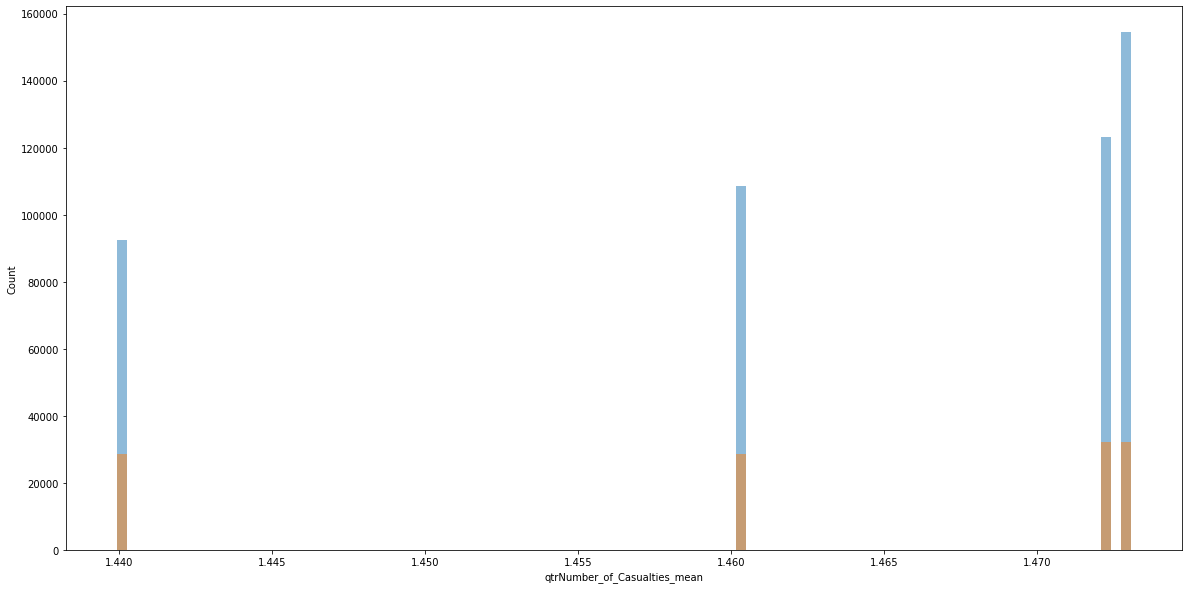

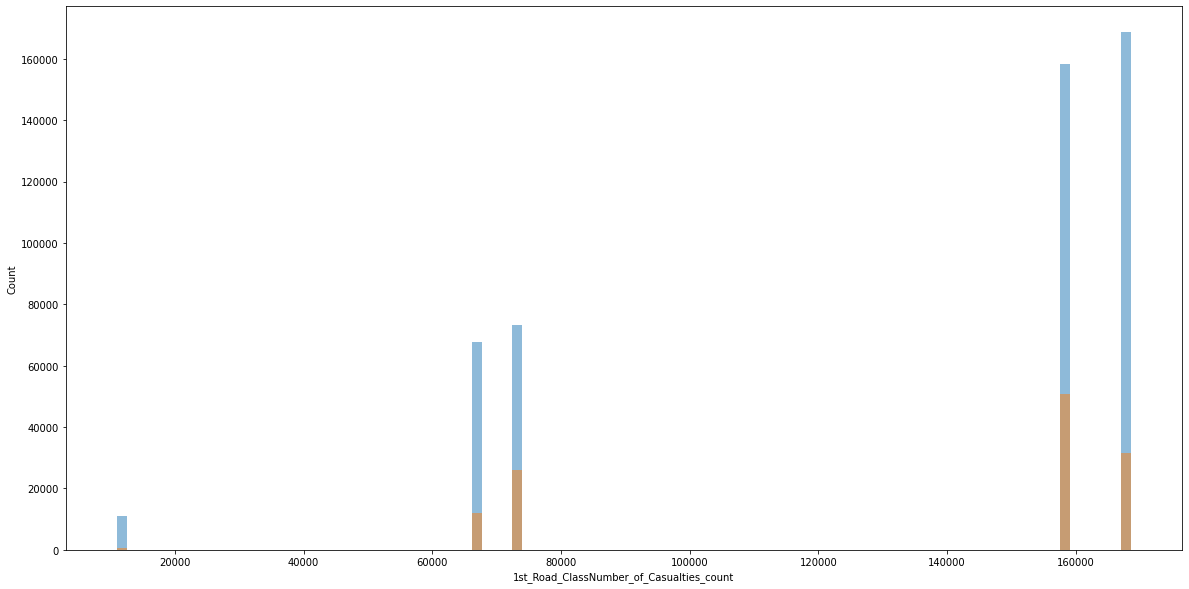

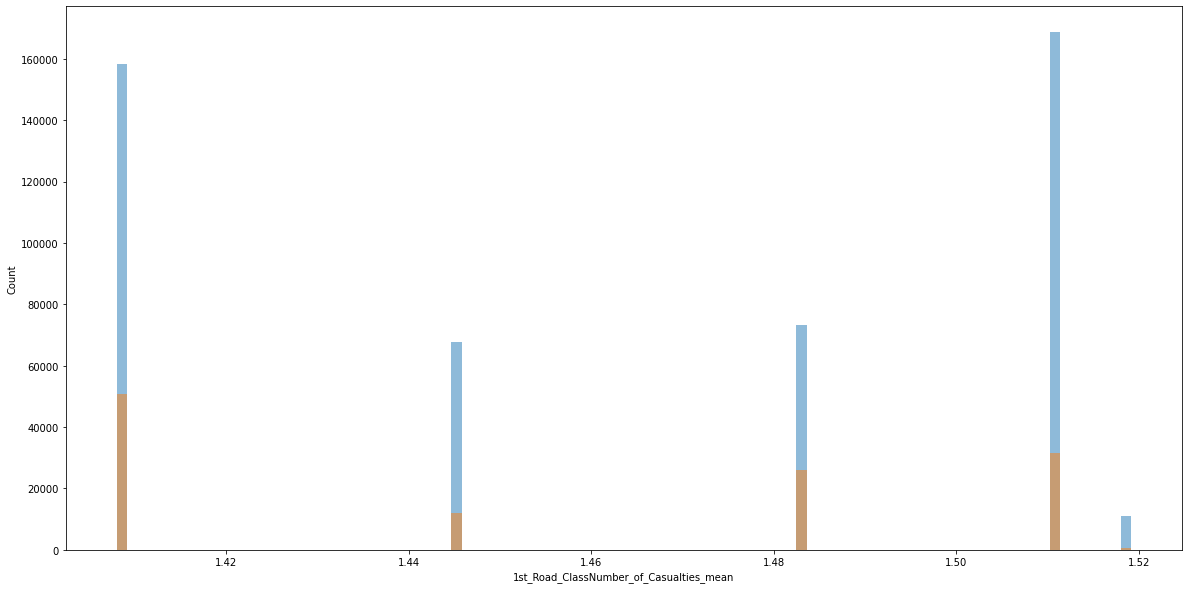

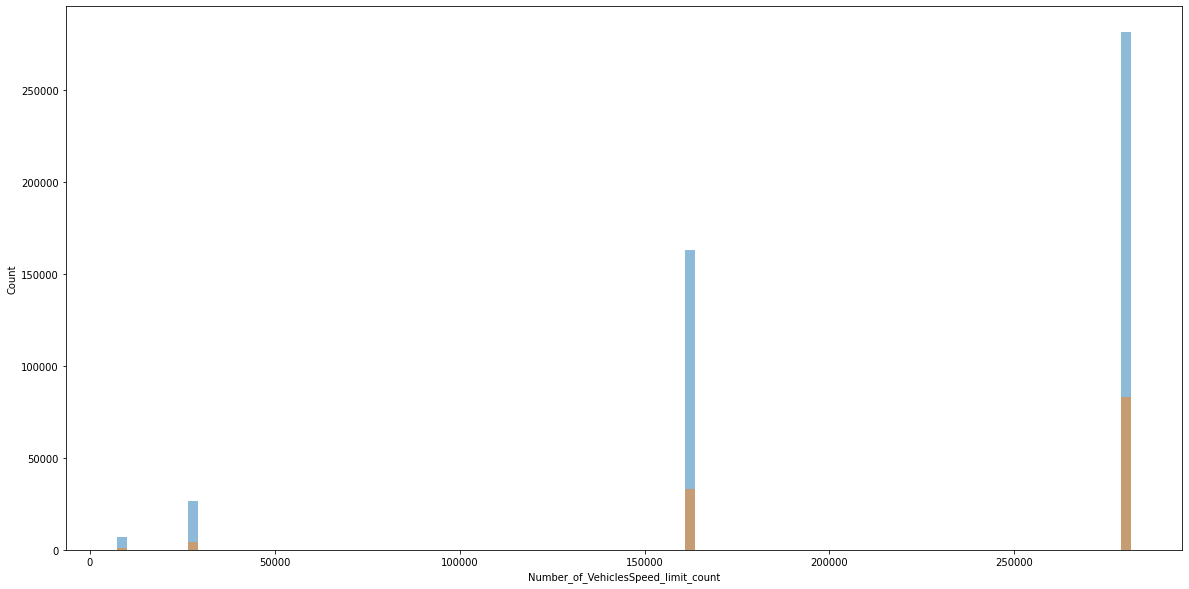

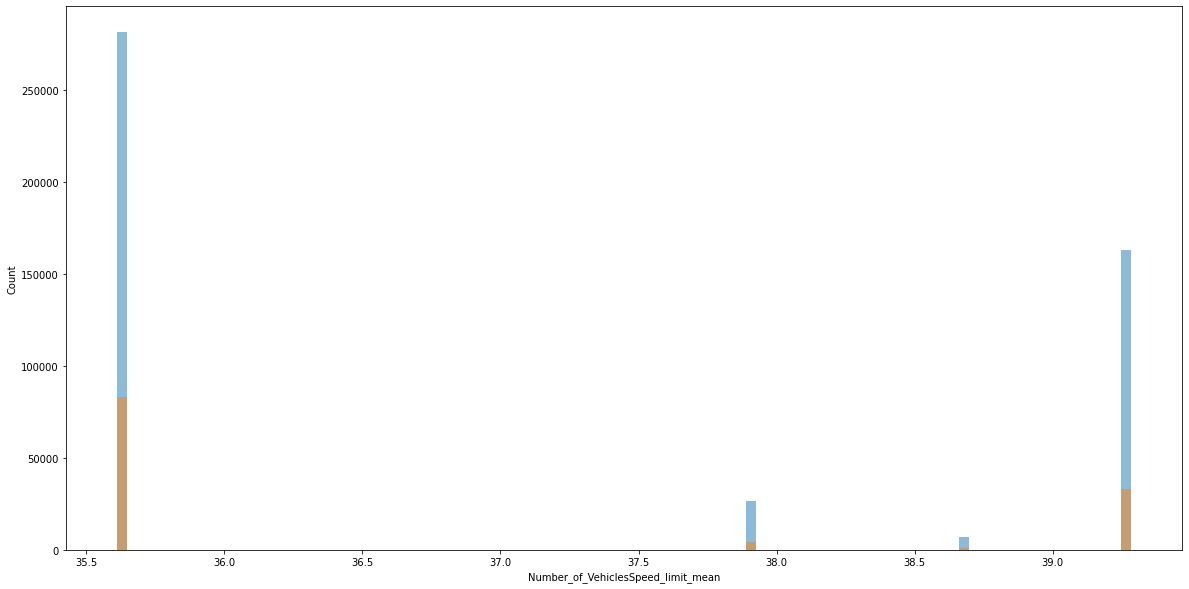

In [68]:
for col in Train.columns:
    fig, (ax1) = plt.subplots(1,1,figsize=(20, 10))
    ax1.hist(Train[col], bins=100, alpha=0.5, label=col);
    ax1.hist(Test[col], bins=100, alpha=0.5, label=col);
    ax1.set(xlabel=col, ylabel="Count")

In [69]:
print(Train.columns[Train.isnull().any()])
print(Test.columns[Test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


In [70]:
Train.head(1)

,Police_Force,Number_of_Vehicles,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,qtr,...,Day_of_WeekNumber_of_Casualties_count,Day_of_WeekNumber_of_Casualties_mean,monthNumber_of_Casualties_count,monthNumber_of_Casualties_mean,qtrNumber_of_Casualties_count,qtrNumber_of_Casualties_mean,1st_Road_ClassNumber_of_Casualties_count,1st_Road_ClassNumber_of_Casualties_mean,Number_of_VehiclesSpeed_limit_count,Number_of_VehiclesSpeed_limit_mean
0,6,2,6,76,6,403,30,-1,1,1,...,101004,1.458962,55225,1.475618,154439,1.47308,158212,1.408041,281598,35.610409


Model Building

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Train_scale    = spark.DataFrame(scaler.fit_transform(Train),columns=Train.columns)
Test_scale = spark.DataFrame(scaler.transform(Test),columns=Test.columns)

In [72]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

def cross_valid(model,X,Y,cv=5):
    results = cross_validate(model, X, Y,scoring="neg_mean_poisson_deviance",
                             cv=cv,return_train_score=True)
    return (results)

In [76]:
!pip install xgboost
!pip install lightgbm
!pip install ipywidgets
!pip install catboost

Cat Boost and LGBM Regression

In [77]:
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import PoissonRegressor,TweedieRegressor,GammaRegressor


Reg_Models = [#PoissonRegressor(),
              #XGBRegressor(objective='count:poisson',
              #             use_label_encoder=False,random_state=SEED,n_jobs=-1),
              CatBoostRegressor(objective='Poisson',silent=True,
                             random_state=SEED),
              LGBMRegressor( objective='poisson',random_state=SEED,n_jobs=-1)
               ]

for i in Reg_Models:  
    model = i
    error = cross_valid(model,Train_scale,Y,cv=5)
    print(error['test_score'])
    print(model,error['train_score'].mean(),error['test_score'].mean())
    print(error['train_score'].mean() - error['test_score'].mean())

[-0.35619126 -0.35894936 -0.35780263 -0.35738669 -0.35861078]
<catboost.core.CatBoostRegressor object at 0x7f60e3918e10> -0.3520257824847578 -0.3577881435764249
0.005762361091667112
[-0.35626819 -0.3592198  -0.3581971  -0.35778914 -0.35880448]
LGBMRegressor(objective='poisson', random_state=22022022) -0.354881898718161 -0.35805574156270836
0.0031738428445473588


Loss by feature elimination

In [78]:
from sklearn.model_selection import StratifiedKFold,KFold,train_test_split
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm

X_train, X_test ,y_train, y_test = train_test_split(Train_scale,Y,random_state=SEED)
feature_names = list(Train.columns)
train_pool = Pool(X_train, y_train, feature_names=feature_names)
test_pool = Pool(X_test, y_test, feature_names=feature_names)

model = CatBoostRegressor(objective='Poisson',silent=True,random_state=SEED)
summary = model.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select='0-41',
    num_features_to_select=27,
    steps=1,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Exact,
    train_final_model=True,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [79]:
sel = ['Police_Force',
  'Number_of_Vehicles',
  'Local_Authority_(District)',
  '1st_Road_Class',
  '1st_Road_Number',
  'Speed_limit',
  '2nd_Road_Class',
  'Urban_or_Rural_Area',
  'qtr',
  'Local_Authority_(Highway)country_count',
  'Road_Typecountry_count',
  'Pedestrian_Crossing-Human_Controlcountry_count',
  'Light_Conditionscountry_count',
  'Road_Surface_Conditionscountry_count',
  'Special_Conditions_at_Sitecountry_count',
  'Carriageway_Hazardscountry_count',
  'Did_Police_Officer_Attend_Scene_of_Accidentcountry_count',
  'statecountry_count',
  'postcodecountry_count',
  'postcode_1Number_of_Casualties_mean',
  'Local_Authority_(Highway)Local_Authority_(District)_mean',
  'TimeNumber_of_Casualties_mean',
  'Day_of_WeekNumber_of_Casualties_mean',
  'monthNumber_of_Casualties_mean',
  '1st_Road_ClassNumber_of_Casualties_mean',
  'Number_of_VehiclesSpeed_limit_count',
  'Number_of_VehiclesSpeed_limit_mean']

In [80]:
#Final Model Traning 
from sklearn.model_selection import cross_validate

clf= CatBoostRegressor(objective='Poisson',silent=True,
                                random_state=SEED)

output = cross_validate(clf,Train_scale[sel],Y, cv=3, scoring = 'neg_mean_squared_error',
                        return_estimator=True,return_train_score=True)

In [81]:
print(output['train_score'].mean())
print(output['test_score'].mean())

-0.6452873646527841
-0.6548518959389891


Feature importance from cat boost regression

In [82]:
feature_importances_avg = [] 

for idx,estimator in enumerate(output['estimator']):
    #print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = estimator.feature_importances_
    feature_importances_avg.append(feature_importances)
    
feature_importances = np.mean(feature_importances_avg,0)
feature_importances = spark.DataFrame(np.mean(feature_importances_avg,0) , 
                     index = Train_scale[sel].columns, columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(50)

,importance
Police_Force,19.128328
Local_Authority_(District),13.864892
1st_Road_Number,9.494172
Local_Authority_(Highway)country_count,5.330473
postcode_1Number_of_Casualties_mean,5.106907
Local_Authority_(Highway)Local_Authority_(District)_mean,5.086196
Speed_limit,4.978483
postcodecountry_count,3.806506
TimeNumber_of_Casualties_mean,2.783206
Light_Conditionscountry_count,2.559912


In [83]:
sub_file = []

for idx,estimator in enumerate(output['estimator']):
    print(idx)
    score = estimator.predict(Test_scale[sel])
    sub_file.append(score)
    
final = np.mean(sub_file,0)

0
1
2


Creating an output csv file to display 'Accident Risk Index'

In [84]:
Test_sub = spark.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/test.csv')
Test_sub['Accident_risk_index'] = final
Target_mapper =  Test_sub.groupby(['postcode'])['Accident_risk_index'].mean()
SampleSubmission['Accident_risk_index'] = SampleSubmission['postcode'].map(Target_mapper)
SampleSubmission['Accident_risk_index'].std(),SampleSubmission.tail()
SampleSubmission.to_csv('26M.csv',index=False)